# Boston House Dataset

- Predicting the sale price of the houses.
- Performing exploratory data analysis.

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
#visualizing the dataset using pandas 
df = pd.read_csv('train.csv')

In [3]:
#determing the shape of the dataset
df.shape

(1460, 81)

In [4]:
#study the type of the data features has
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
#to know the dtype of features and their non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- Many columns are more than 40% empty. Such features will be dropped to avoid tweeking the data.
- Feature size is huge. Hence less related columns will be dropped as well.

In [7]:
#seeing the percentage of null count in the dataset in each column
pd.options.display.max_rows=None
print(df.isnull().sum()*100/len(df))

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [8]:
#to clean the dataset, features which are more than 40% are dropped
perc = 40.0
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df = df.dropna( axis=1, thresh=min_count)

In [9]:
#Separated the dataset in two, to study object and numberical type of data individually
df_cat = df.select_dtypes(include='object')
df_num = df.select_dtypes(exclude = 'object')

- It'll make it easier to understand data.
- Visualization will be easier and hence analysis would be better as well.

In [10]:
print(df_num.shape)
print(df_cat.shape)

(1460, 38)
(1460, 38)


## Visualisationing Categorical data

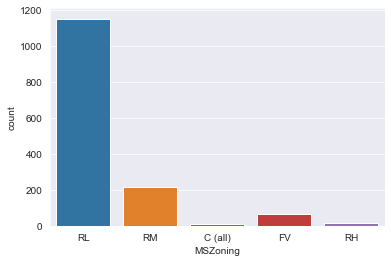

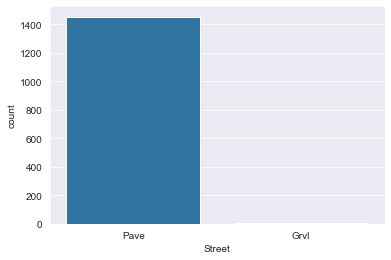

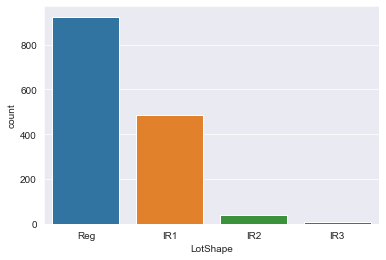

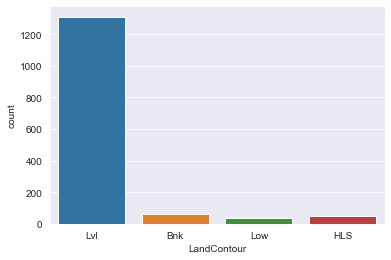

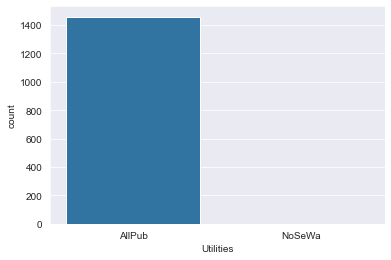

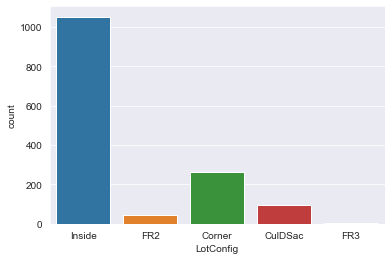

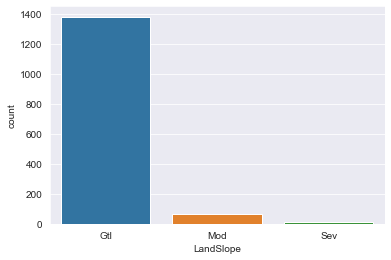

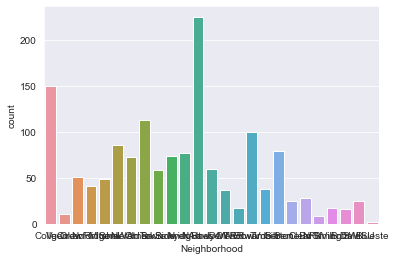

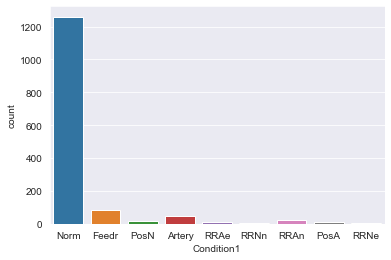

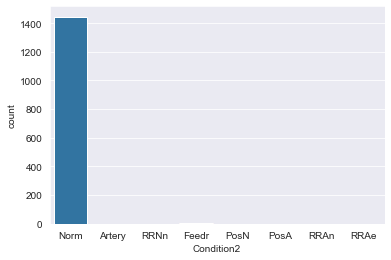

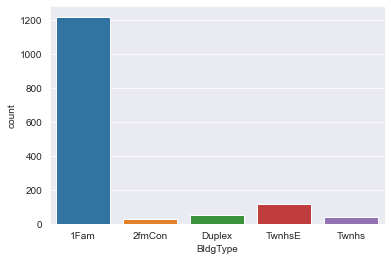

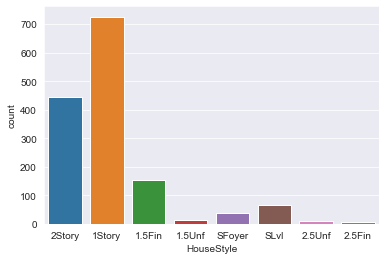

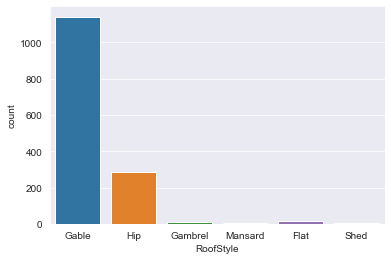

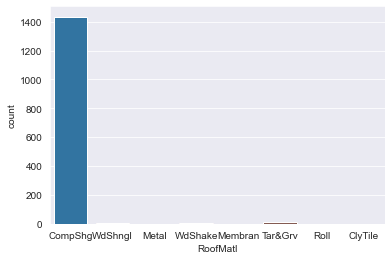

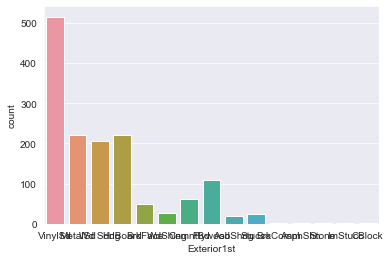

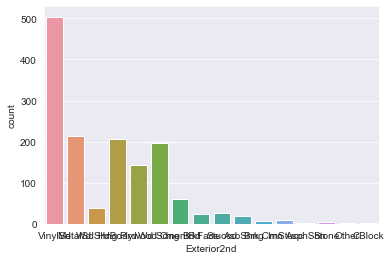

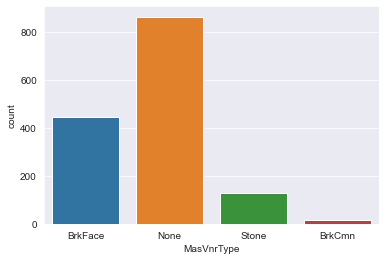

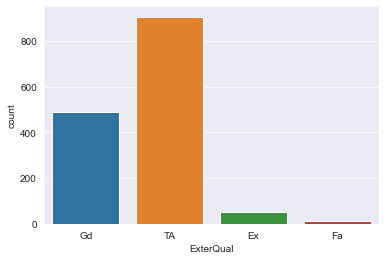

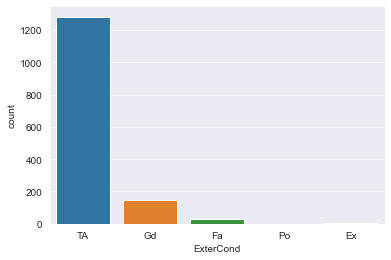

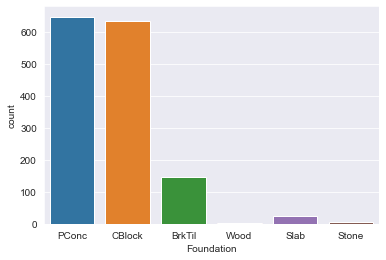

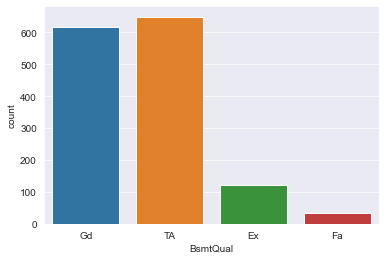

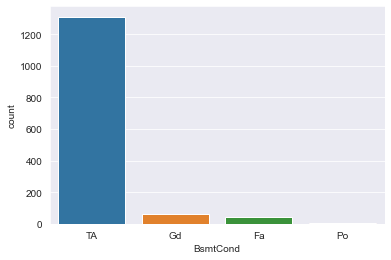

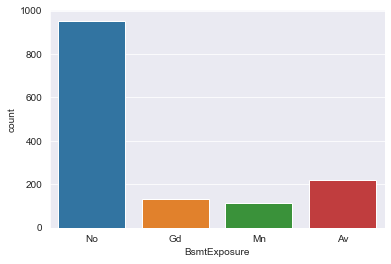

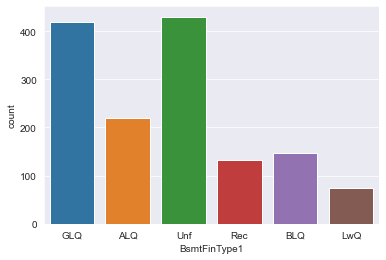

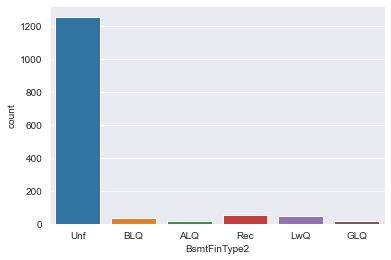

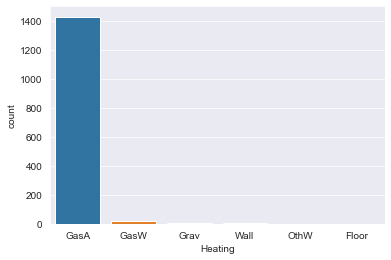

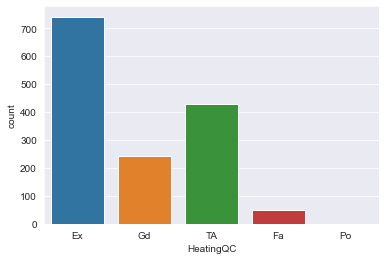

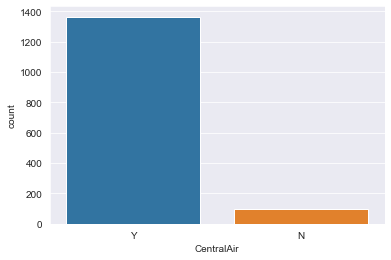

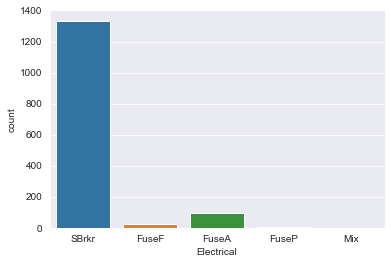

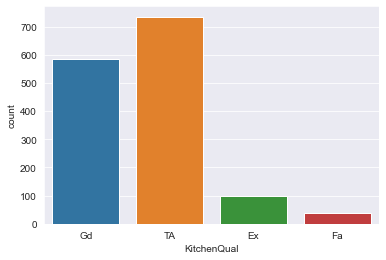

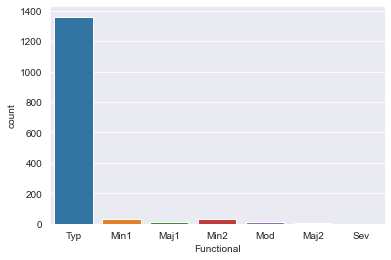

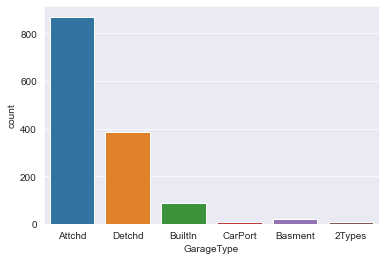

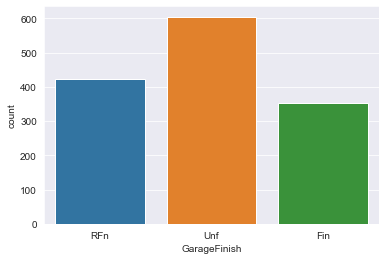

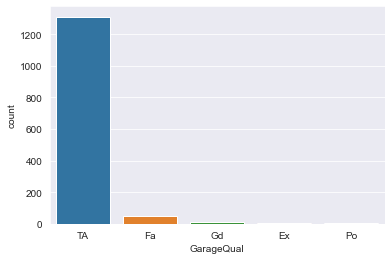

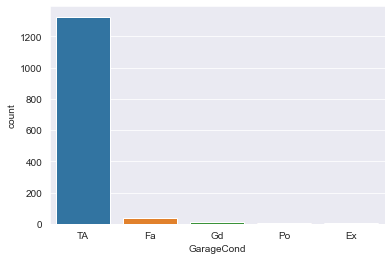

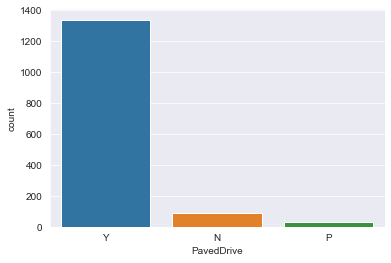

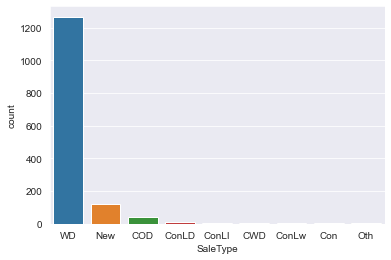

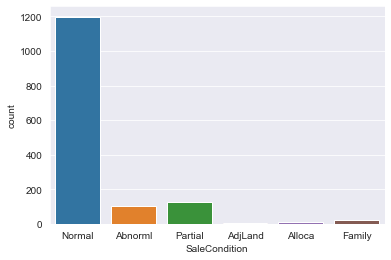

In [11]:
# Making count plot of all the categorical columns
for i in df_cat.columns:
    sns.set_style('darkgrid')
    sns.countplot(x = i, data = df_cat)
    plt.show()


- Most of the houses are in low density zone.
- Almost every house has paved street.
- Most of the lots has regular shape, are on leveled ground and has all public facilities.
- About 78% houses are inside rather on corner.
- Houses suited for 1 family with normal condition are maximum.

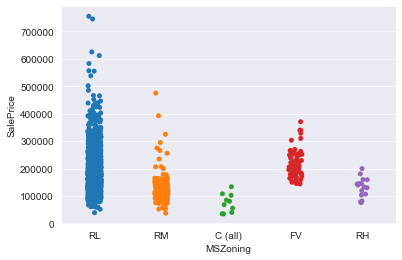

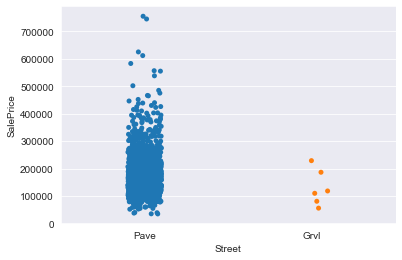

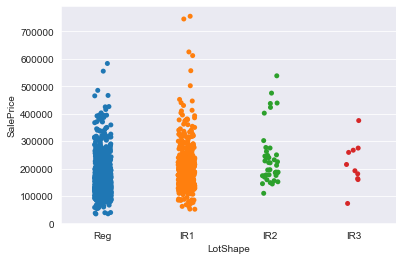

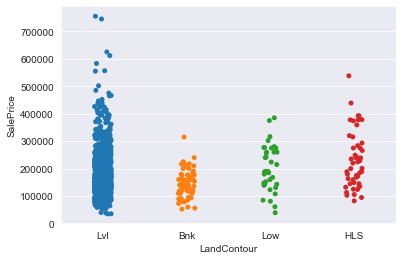

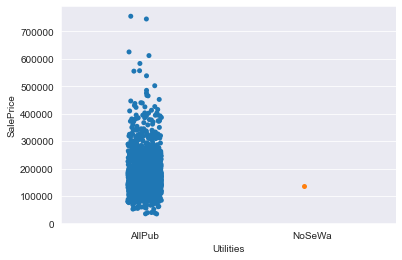

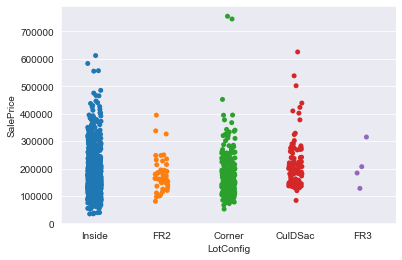

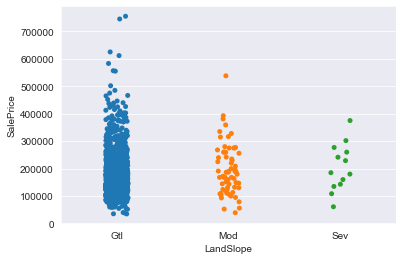

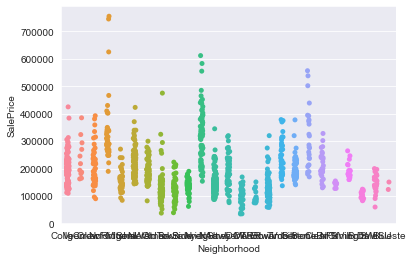

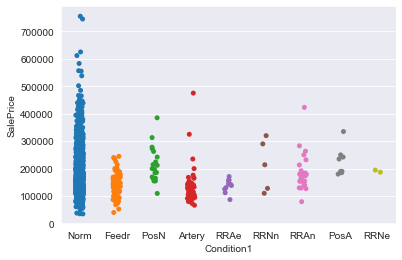

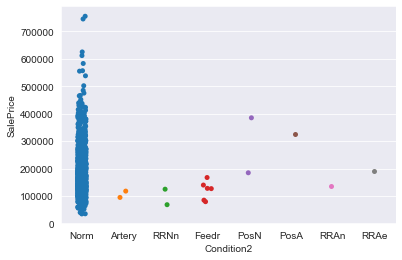

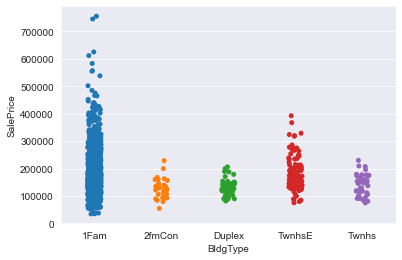

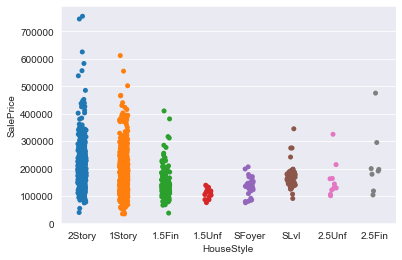

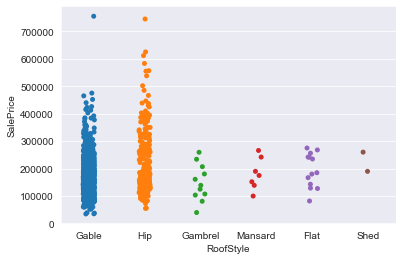

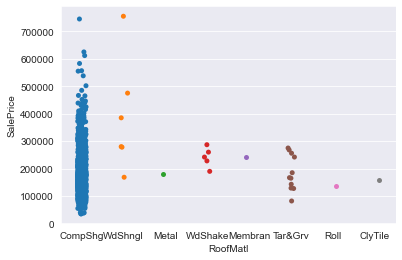

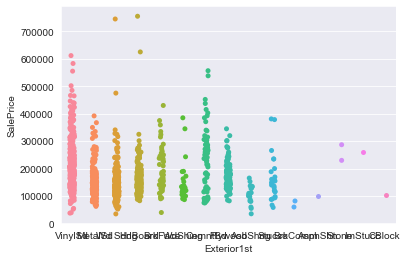

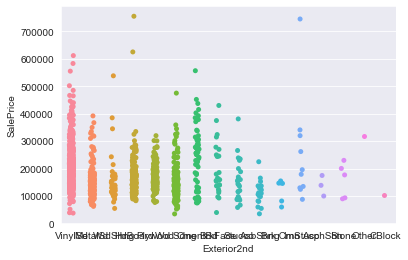

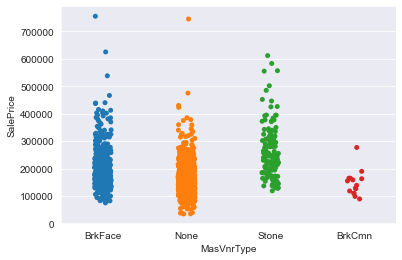

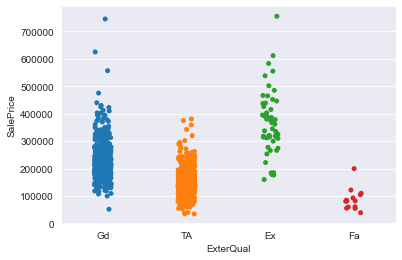

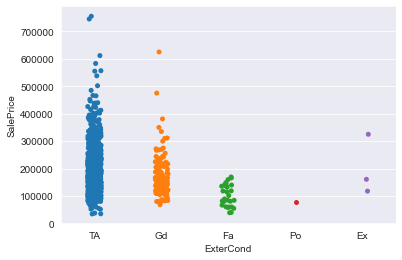

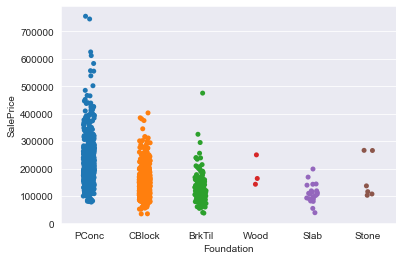

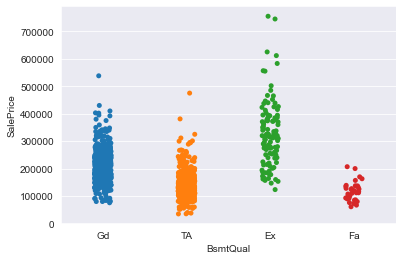

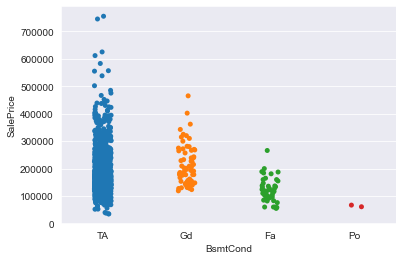

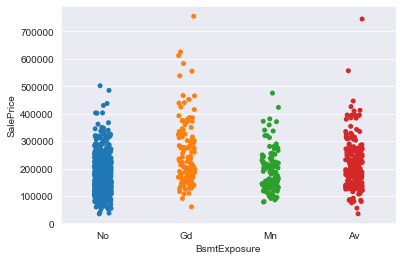

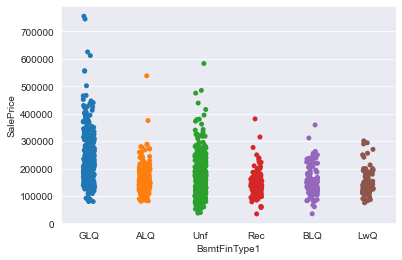

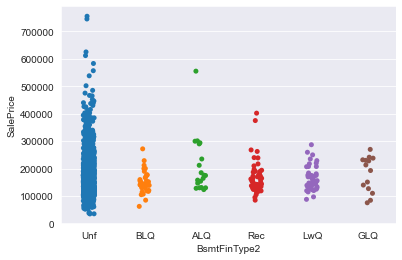

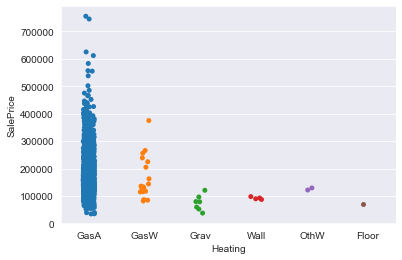

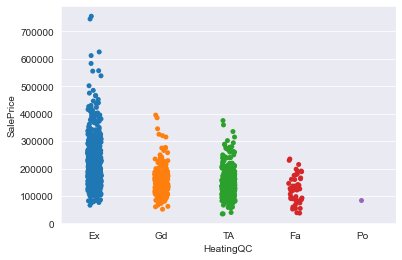

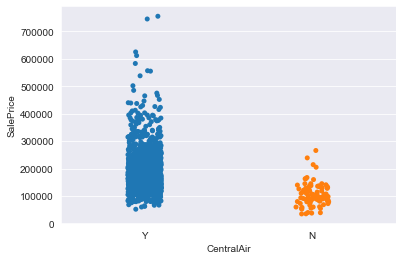

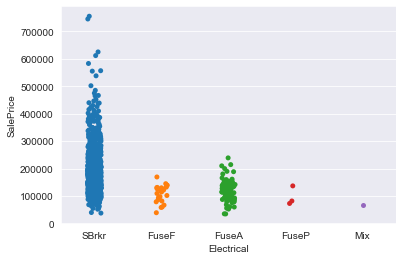

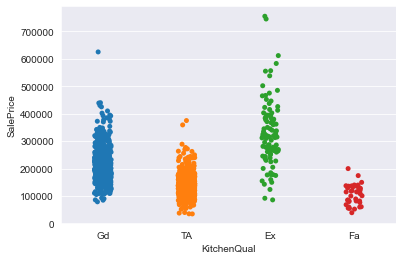

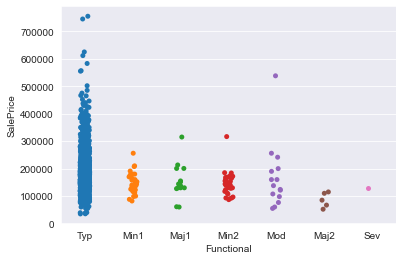

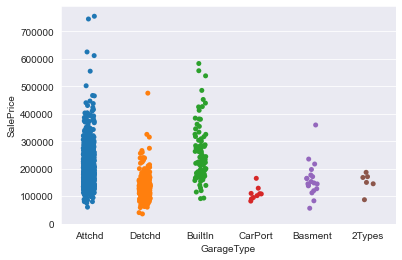

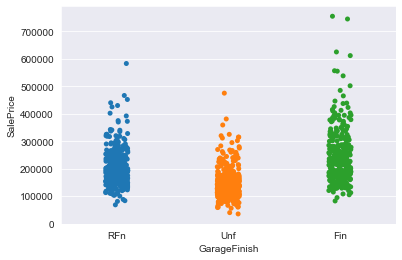

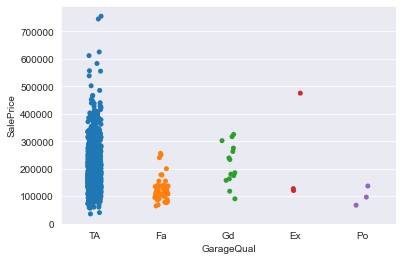

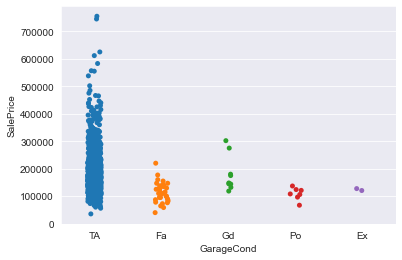

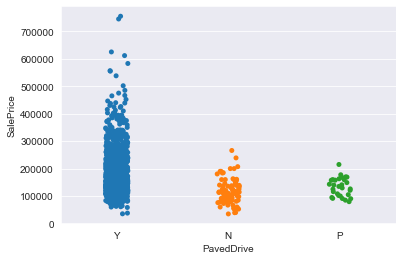

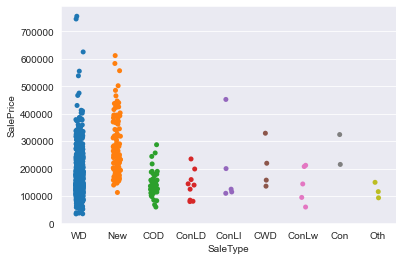

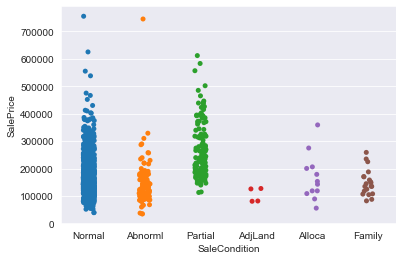

In [12]:
#making stripplots to visualize the categories properly
for i in df_cat.columns:
    sns.set_style('darkgrid')
    sns.stripplot(x=i, y='SalePrice', data=df)
    plt.show()

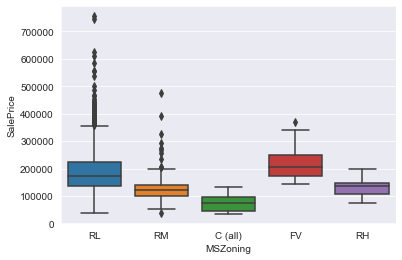

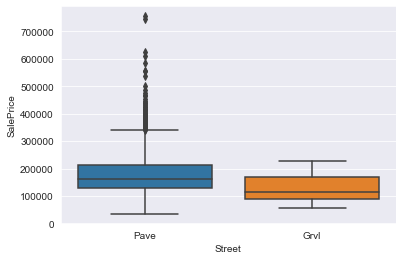

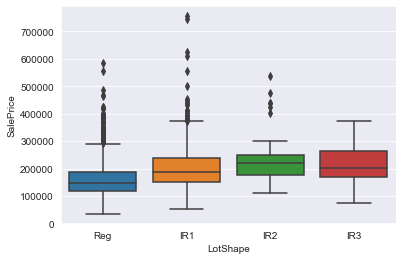

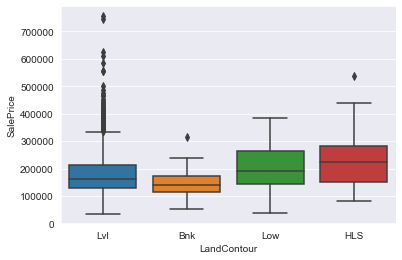

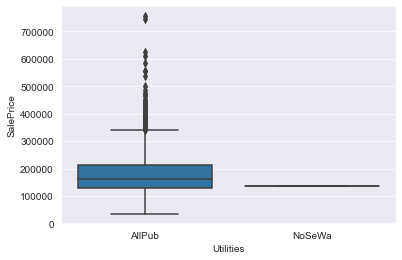

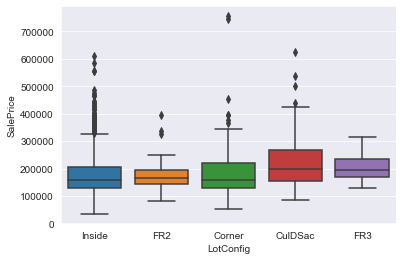

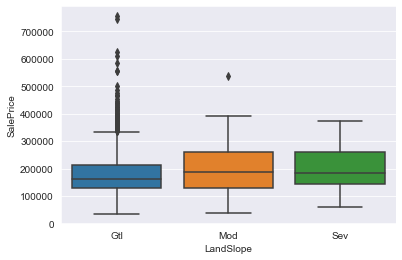

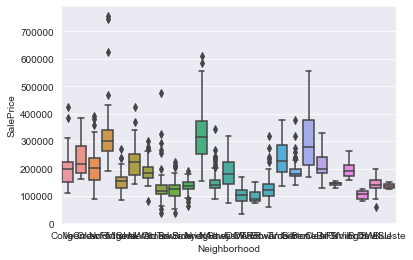

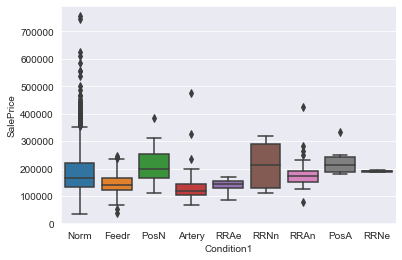

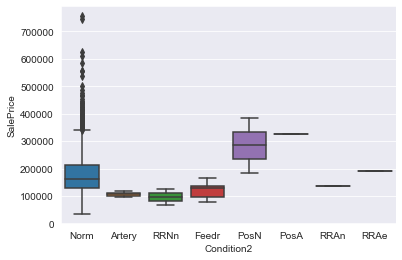

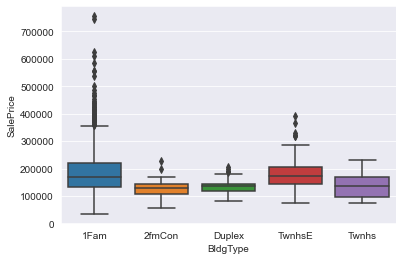

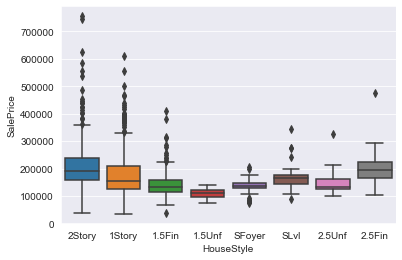

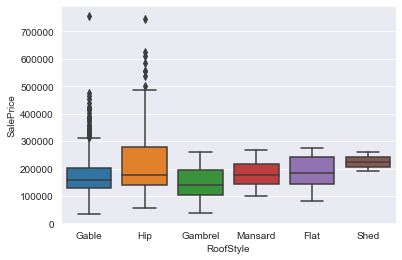

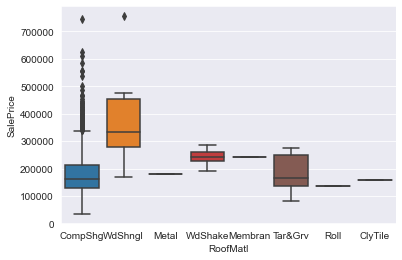

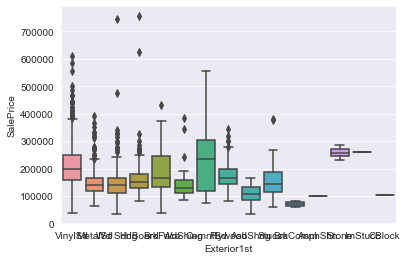

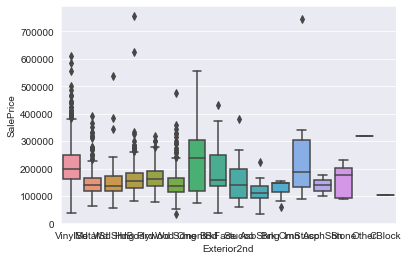

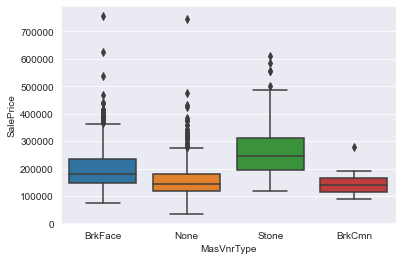

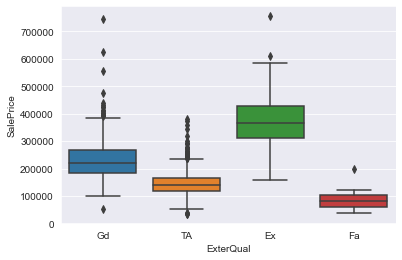

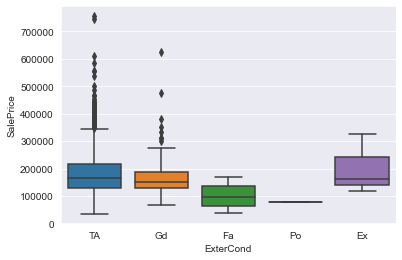

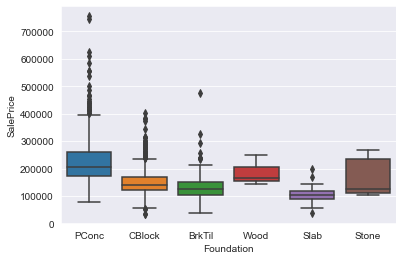

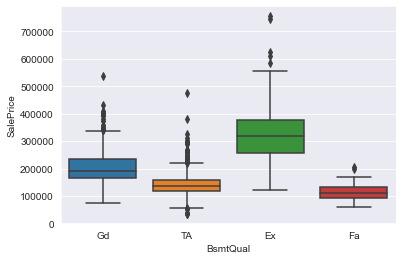

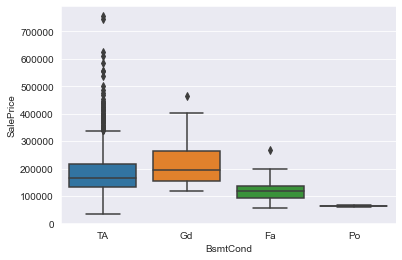

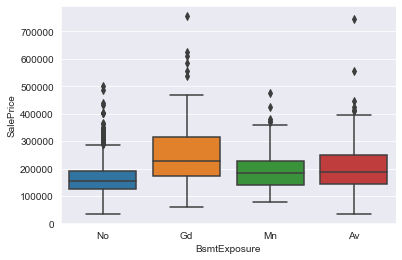

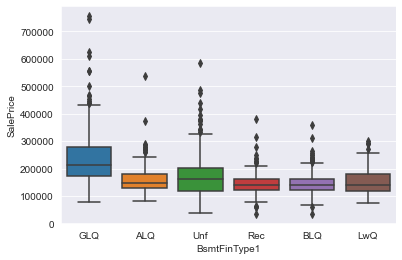

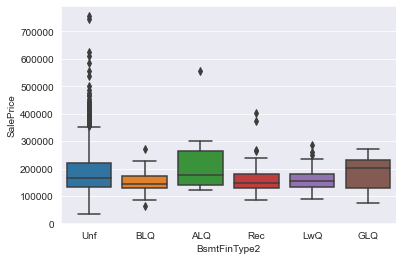

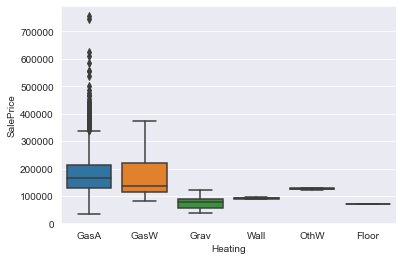

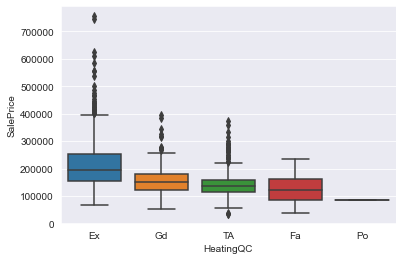

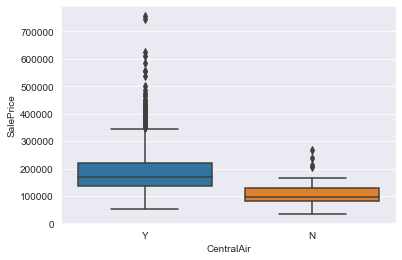

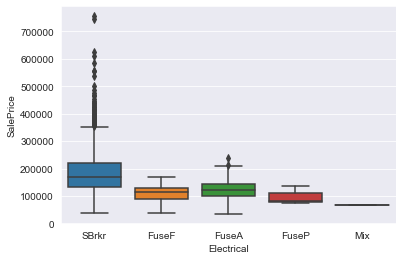

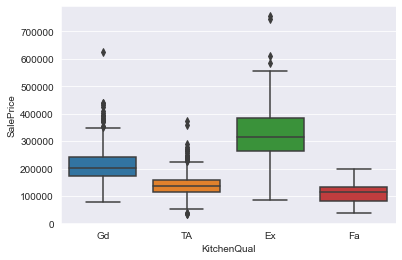

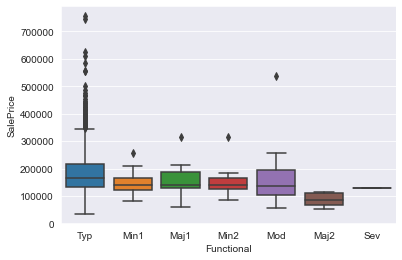

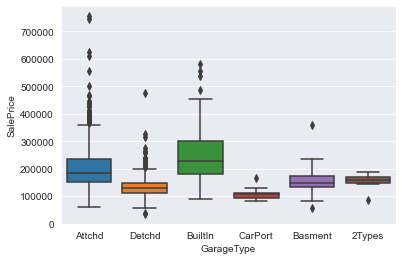

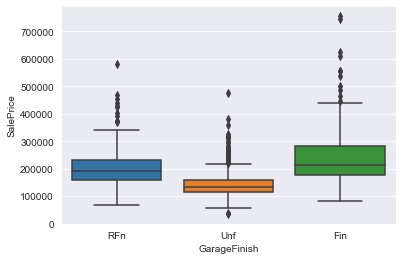

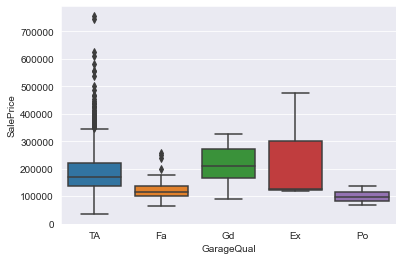

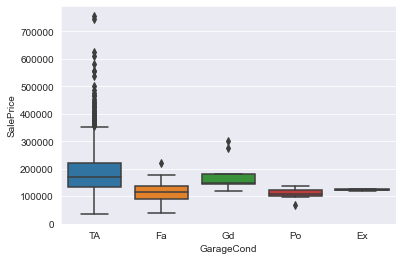

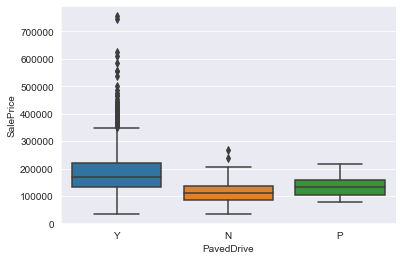

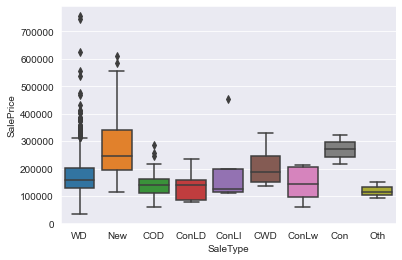

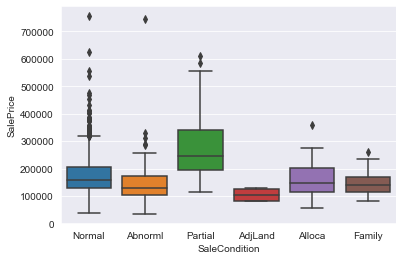

In [13]:
#Boxplots to check the outliers in the dataset
for i in df_cat.columns:
    sns.set_style('darkgrid')
    sns.boxplot(x=i, y='SalePrice', data=df)
    plt.show()

- All features has outliers.
- These outliers will be removed for better machine learning optimization.

In [14]:
#Checking correlation of features with Saleprice
#Usinf label encoder to convert object type of data into numerical.
label_cat = df_cat.apply(LabelEncoder().fit_transform)
label_cat['SalePrice'] = df['SalePrice']

correlation_cat = label_cat.corr()
correlation_cat.sort_values(['SalePrice'], ascending= True, inplace =True )
correlation_cat.SalePrice

ExterQual       -0.636884
BsmtQual        -0.620886
KitchenQual     -0.589189
GarageFinish    -0.549247
GarageType      -0.415283
HeatingQC       -0.400178
BsmtExposure    -0.309043
LotShape        -0.255580
MSZoning        -0.166872
BsmtFinType1    -0.103114
Heating         -0.098812
BldgType        -0.085591
LotConfig       -0.067396
SaleType        -0.054911
Utilities       -0.014314
GarageQual       0.006861
Condition2       0.007513
BsmtFinType2     0.008041
BsmtCond         0.015058
LandContour      0.015453
GarageCond       0.025149
MasVnrType       0.029658
Street           0.041036
LandSlope        0.051152
Condition1       0.091155
Exterior1st      0.103551
Exterior2nd      0.103766
Functional       0.115328
ExterCond        0.117303
RoofMatl         0.132383
HouseStyle       0.180163
Neighborhood     0.210851
SaleCondition    0.213092
RoofStyle        0.222405
PavedDrive       0.231357
Electrical       0.234716
CentralAir       0.251328
Foundation       0.382479
SalePrice   

- Removing less correlated columns.
- Removing columns with correlation between -0.2 and 0.2 would loss most of the data.
- Hence, features with correlation between -0.1 and 0.1 are removed.

In [15]:
#dropping less correlated columns
column = ['Heating','BldgType','LotConfig','SaleType','Utilities','GarageQual','Condition2','BsmtFinType2',
          'BsmtCond','LandContour','GarageCond','MasVnrType','Street','LandSlope','Condition1']
for i in column:
    df_cat = df_cat.drop(columns=i)

In [16]:
#Filling NaN values
columns = ['BsmtQual','BsmtExposure','BsmtFinType1','Electrical','GarageType','GarageFinish']
for i in columns:
    df_cat = df_cat.fillna(df[i].value_counts().index[0])

## Visualizing and Wrangling Numerical data type

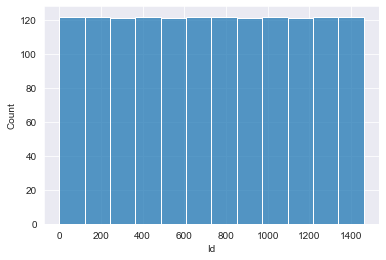

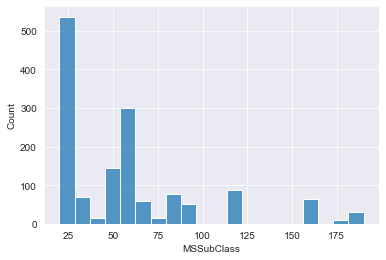

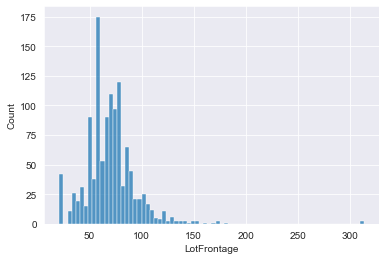

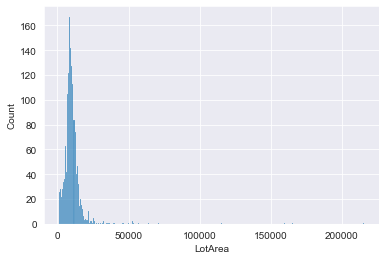

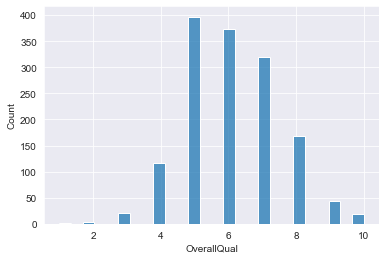

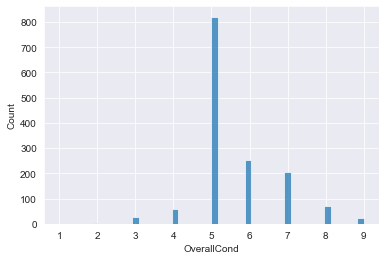

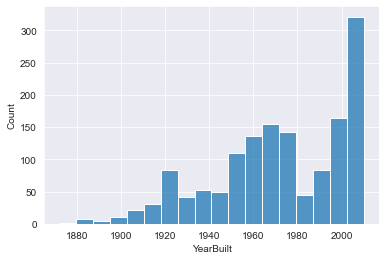

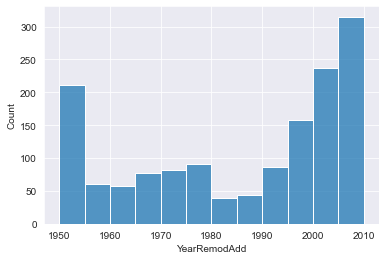

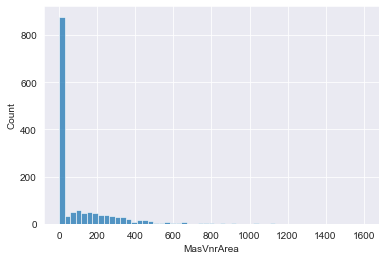

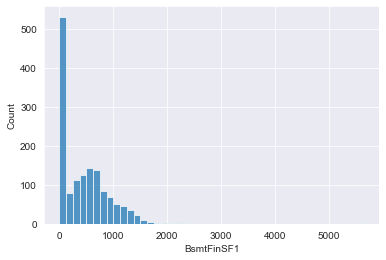

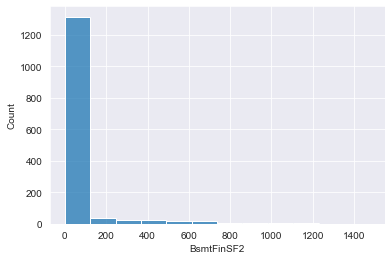

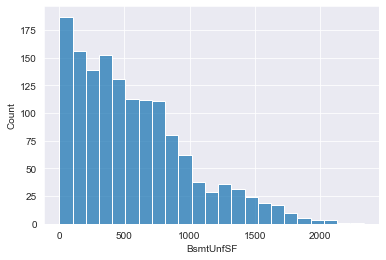

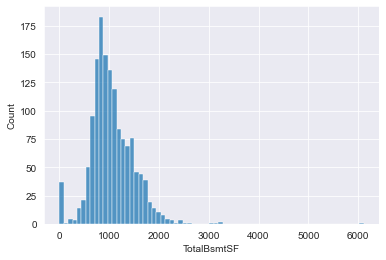

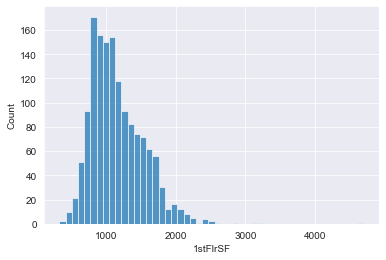

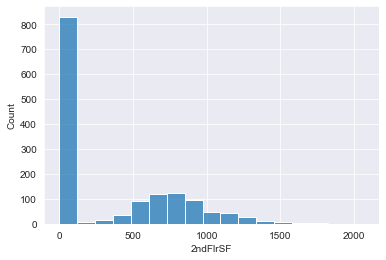

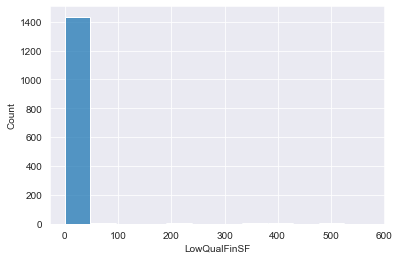

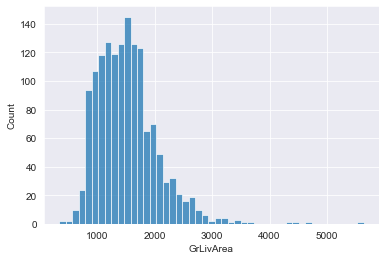

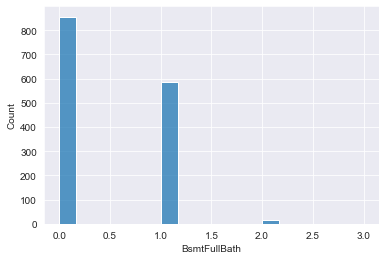

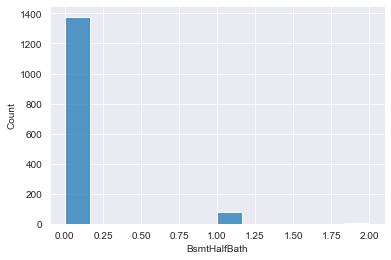

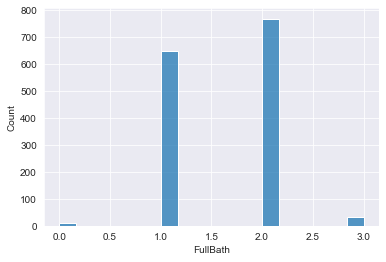

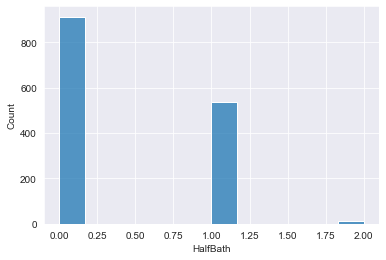

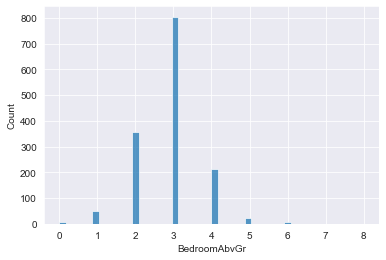

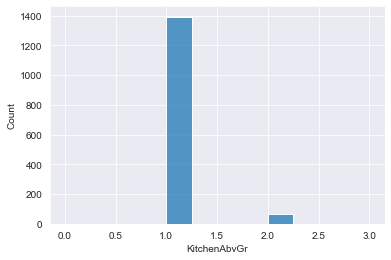

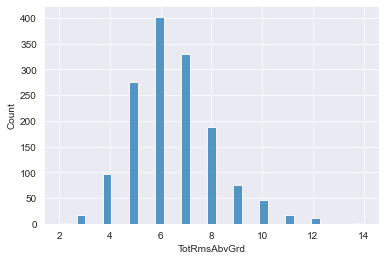

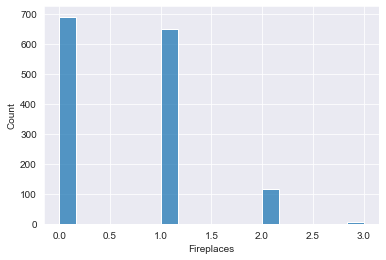

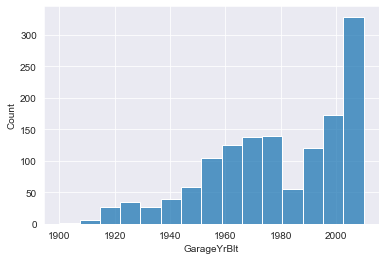

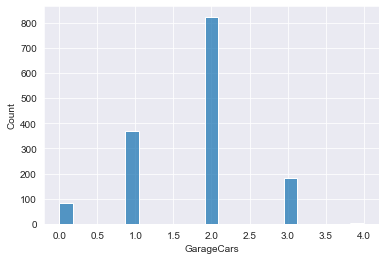

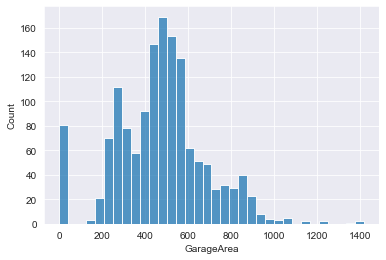

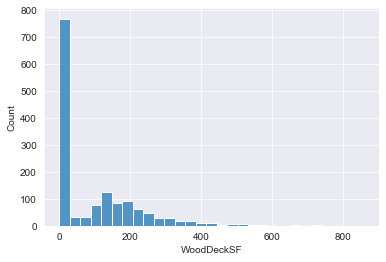

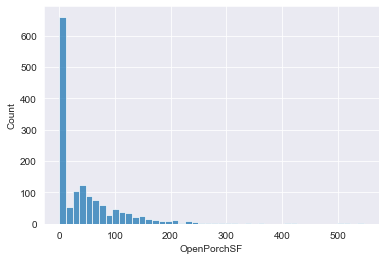

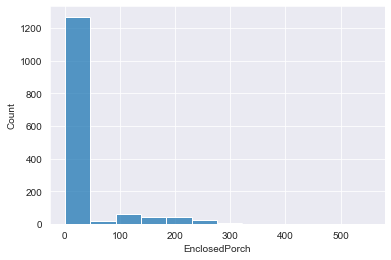

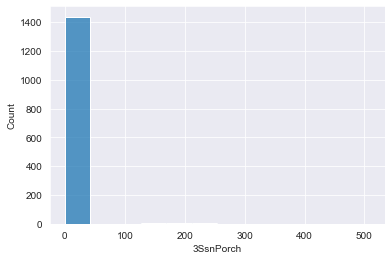

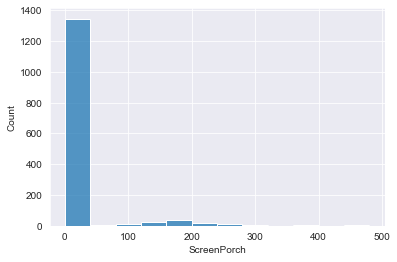

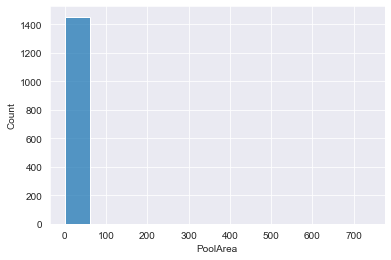

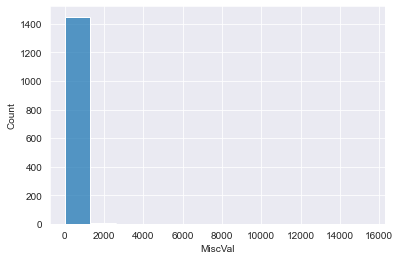

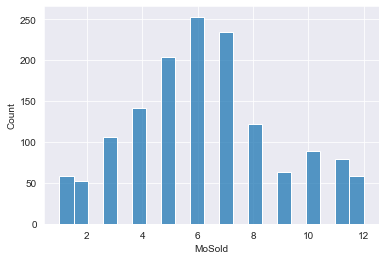

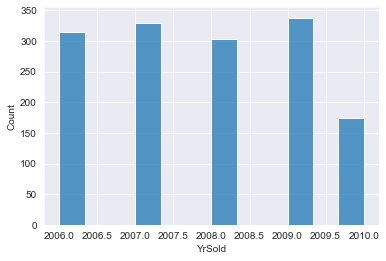

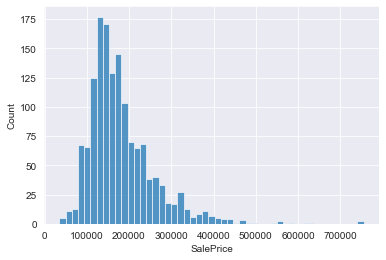

In [17]:
#Making histplot usinf seaborn
for i in df_num.columns:
    sns.histplot(x=df_num[i])
    plt.show()

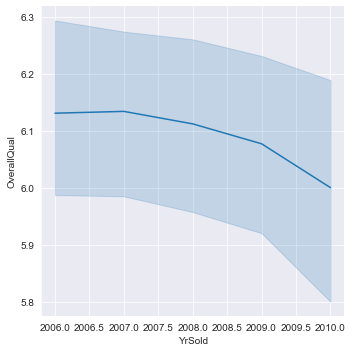

In [18]:
#making relplot to visualize change in OverQuality over time
sns.relplot(x = 'YrSold', y = 'OverallQual', kind= 'line', data = df_num)
plt.show()

- OverallQuality decreased from 2006 to 2010.

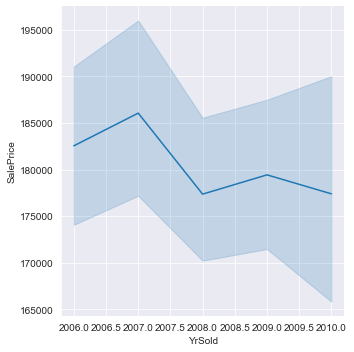

In [19]:
#making relplot to visualize change in OverQuality and SalePrice over time
sns.relplot(x = 'YrSold', y = 'SalePrice', kind= 'line', data = df_num)
plt.show()

- Sale price increased in year 2006 and made a sharp decrease in 2007.

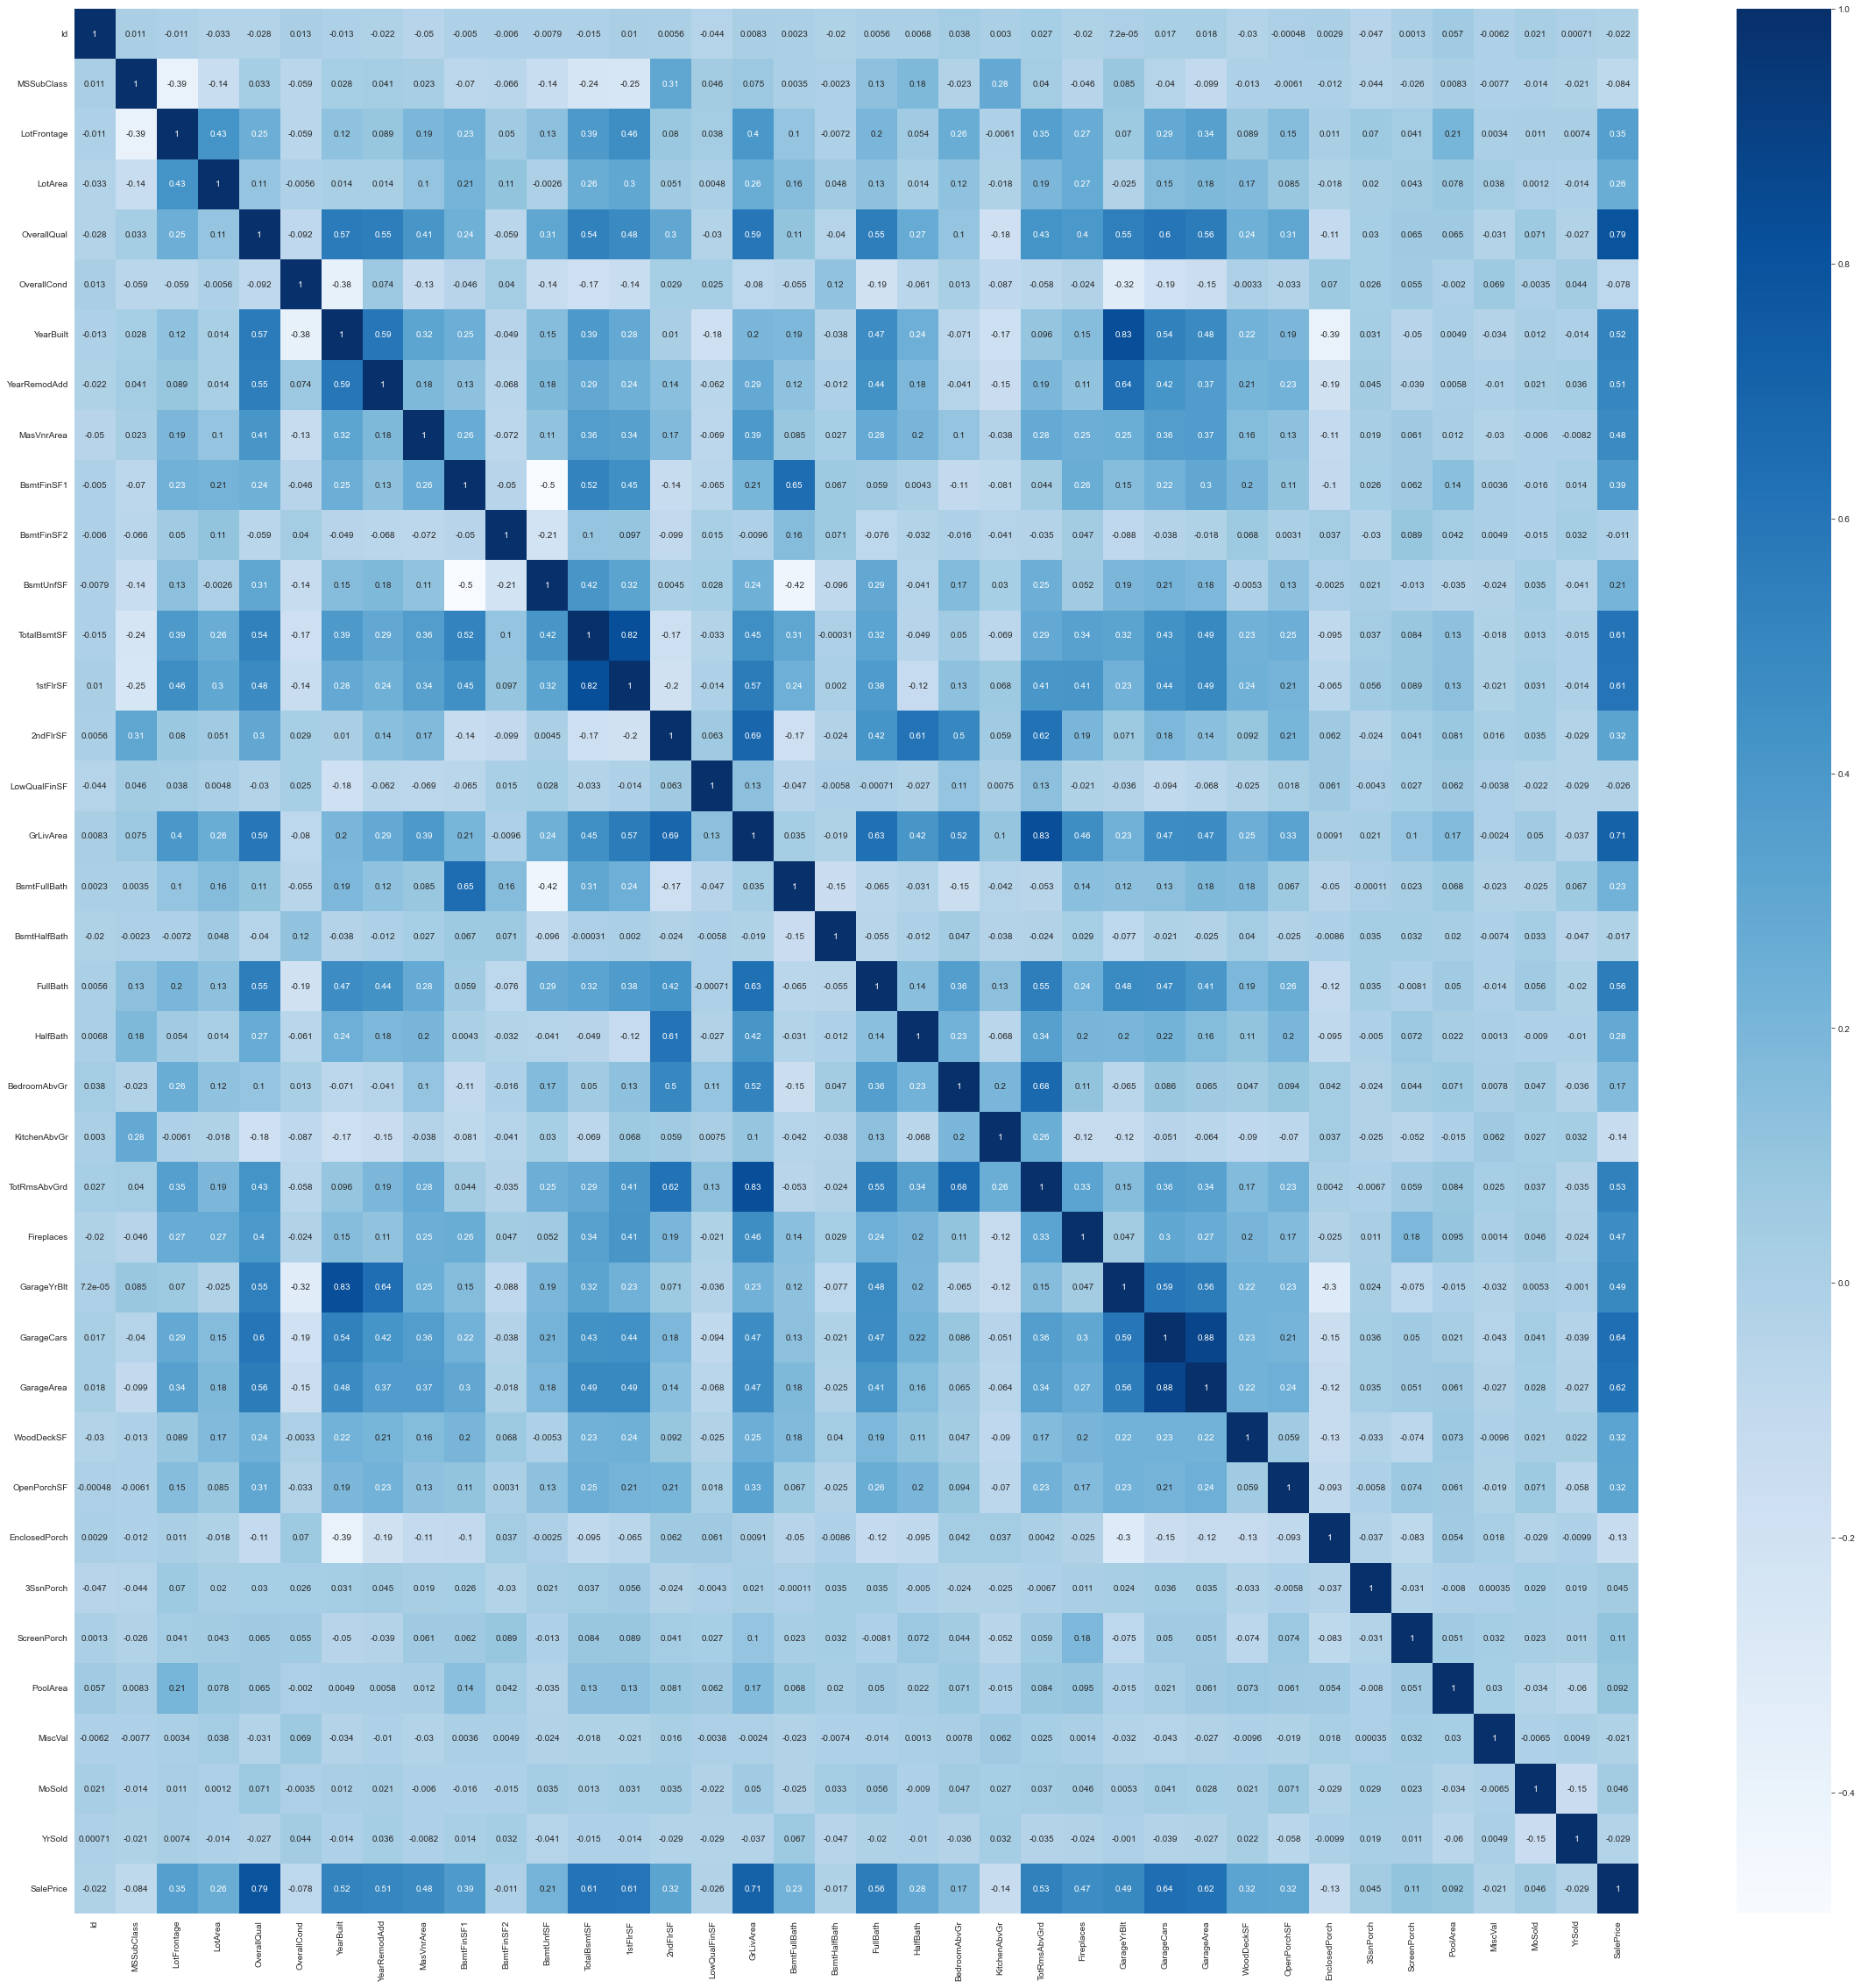

In [20]:
plt.figure(figsize=(40,40))
sns.heatmap(df_num.corr(), cmap = 'Blues', annot=True)
plt.show()

- GarageYrBlt has very high correlation with YearBuilt.
- TotRmsAbvGrd has high correlation with GrLivArea.
- Columns with very high correlation affects the machine learning model negatively.
- Columns with correlation above 0.9 would be dropped to avoid overfitting.

In [21]:
#making correlation metrix of numerical data 
correlation_num = df_num.corr()
correlation_num.sort_values(['SalePrice'], ascending= True, inplace =True )

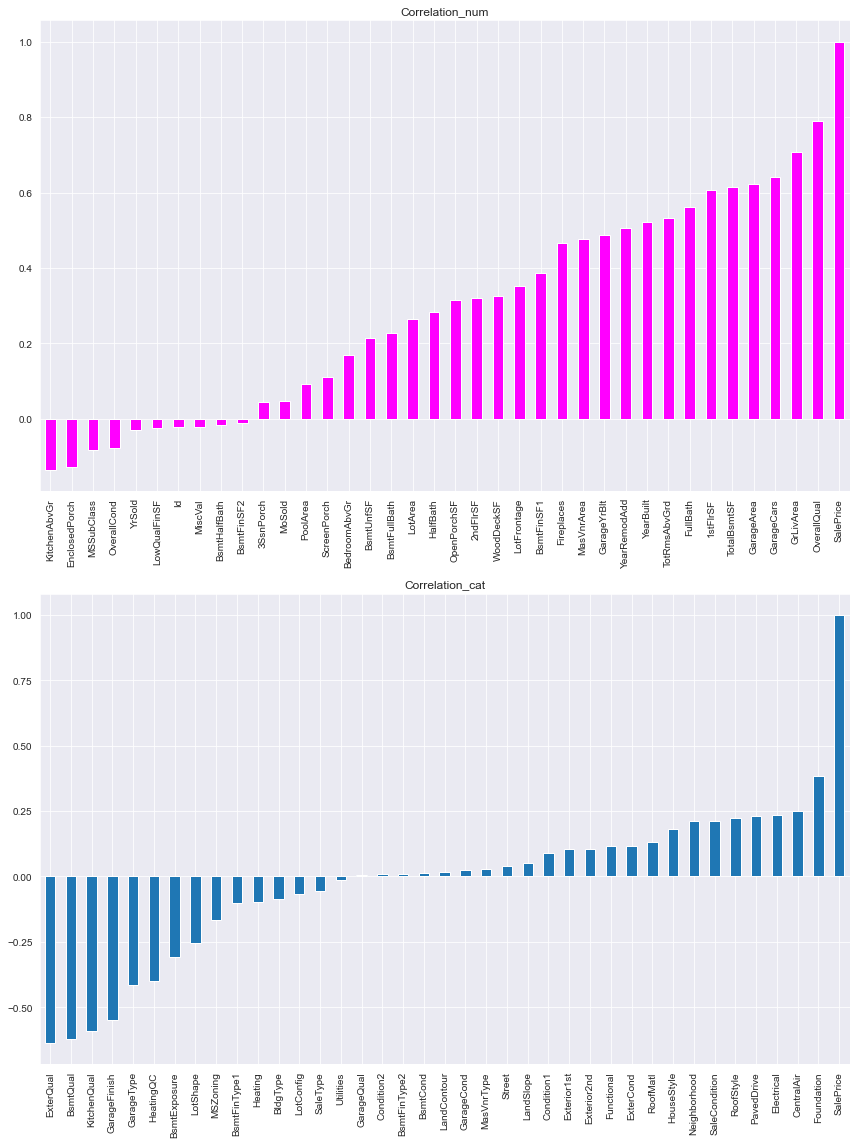

In [22]:
##Making correlation bar plot 
fig, ax = plt.subplots(2,1, figsize= (12,16))
correlation_num.SalePrice.plot.bar(ax= ax[0], cmap='spring')
correlation_cat.SalePrice.plot.bar(ax= ax[1])
ax[0].set_title('Correlation_num')
ax[1].set_title('Correlation_cat')
plt.tight_layout()
plt.show()

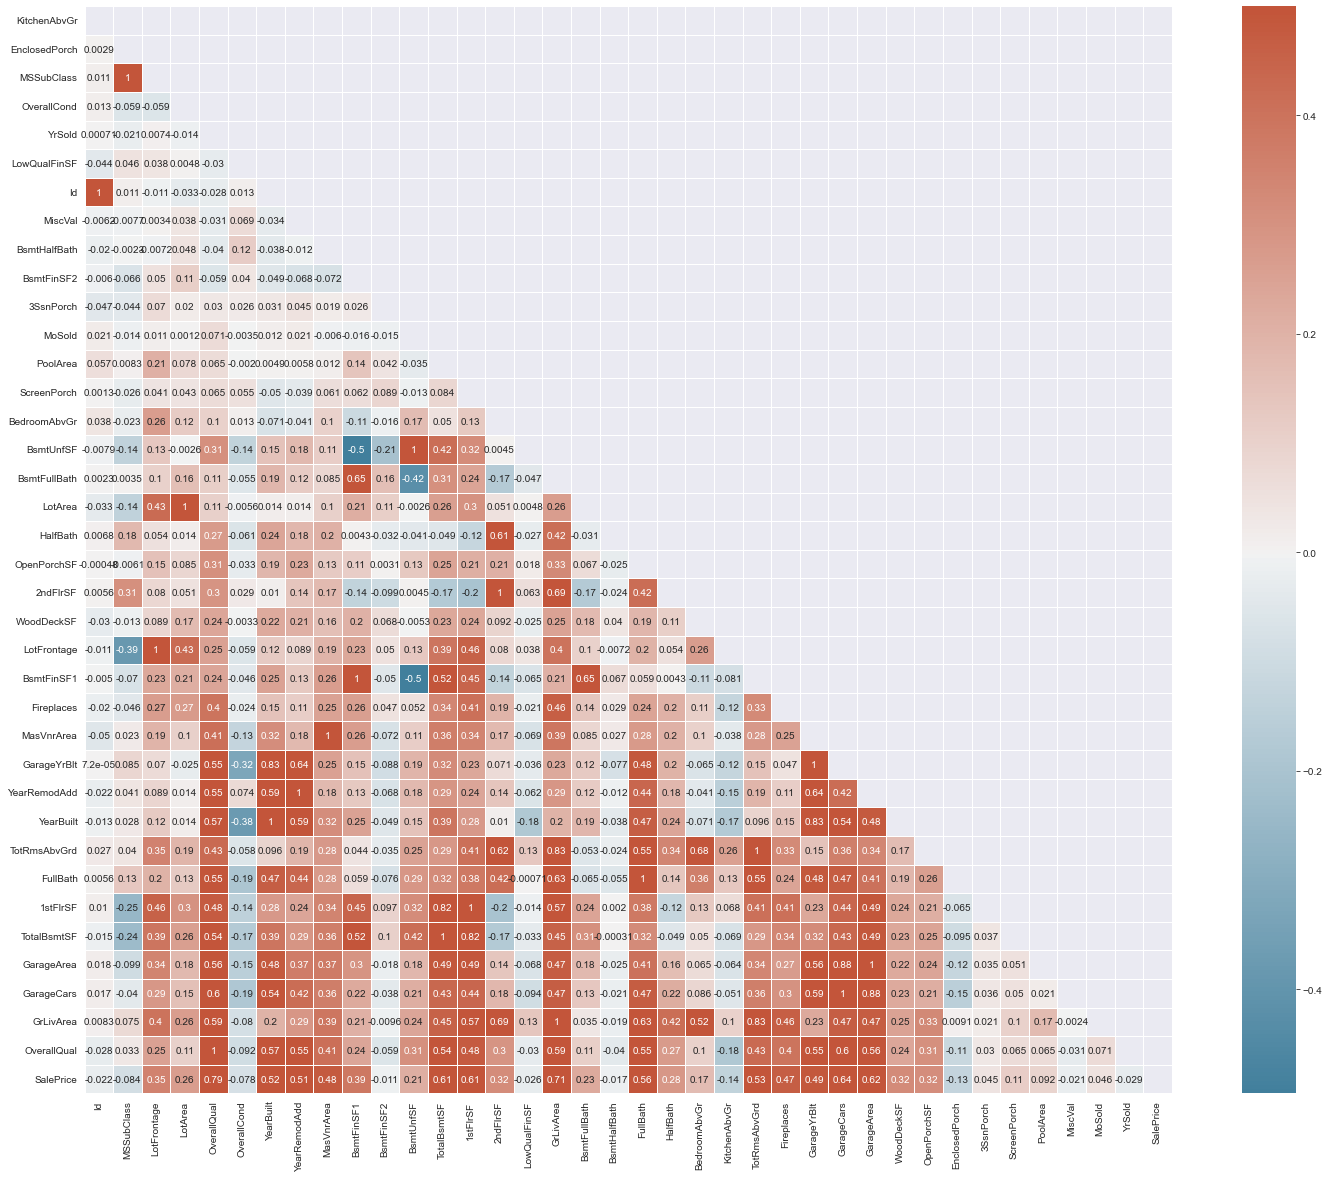

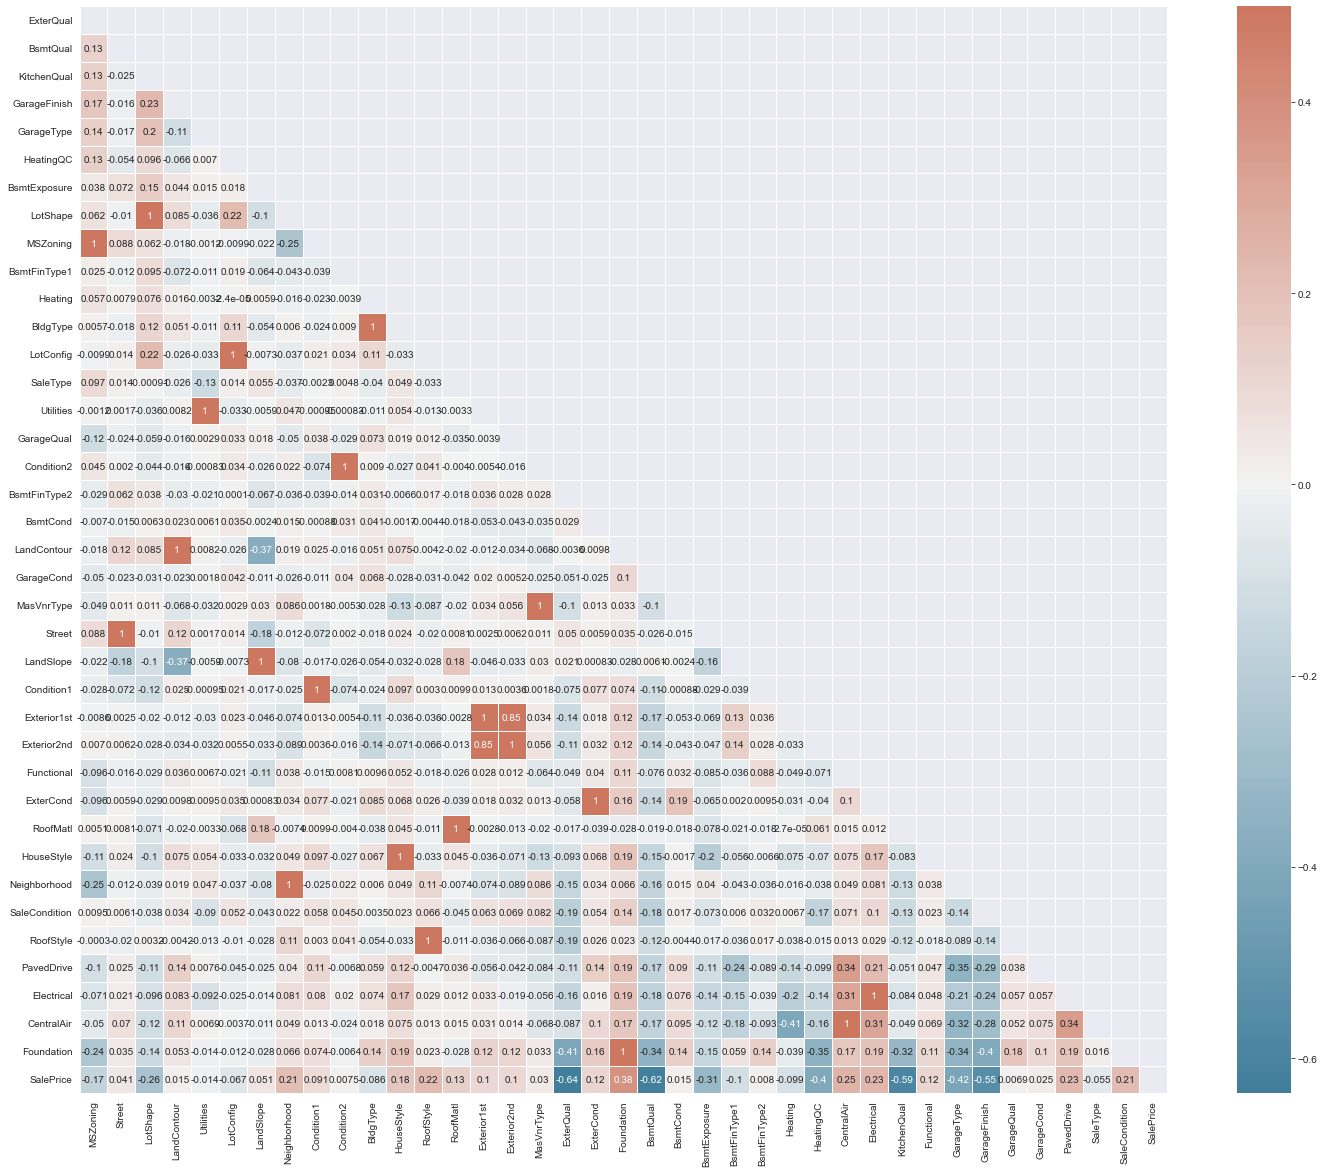

In [23]:
#Correlation heatmap with mask
mask = np.triu(np.ones_like(correlation_num, dtype=bool))
f, ax = plt.subplots(figsize=(25, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_num, annot= True,mask=mask, cmap=cmap, vmax=.5, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": 1.0})
plt.show()

mask = np.triu(np.ones_like(correlation_cat, dtype=bool))
f, ax = plt.subplots(figsize=(25, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_cat, annot= True,mask=mask, cmap=cmap, vmax=.5, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": 1.0})
plt.show()

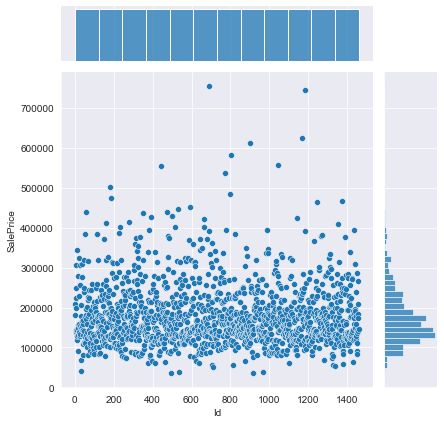

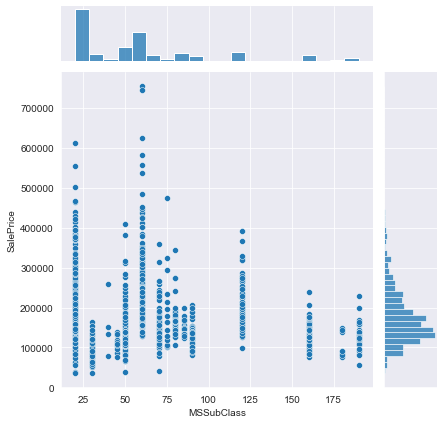

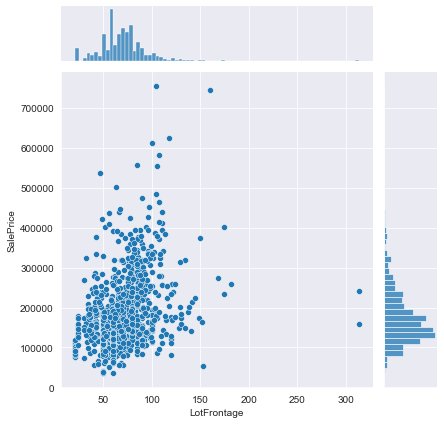

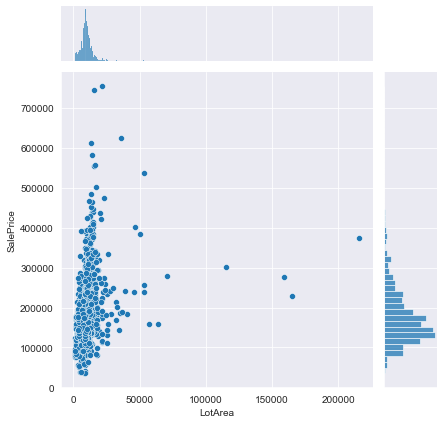

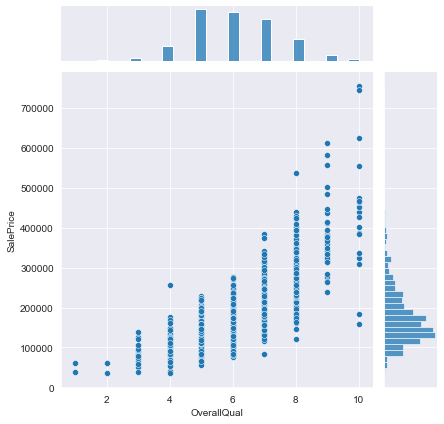

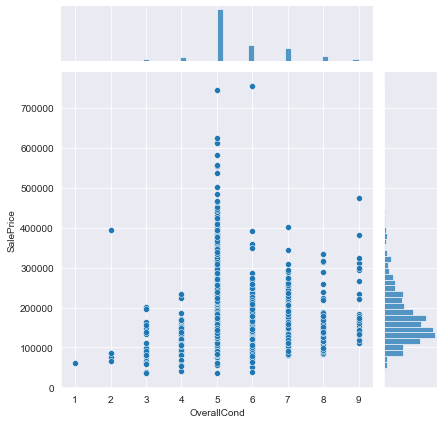

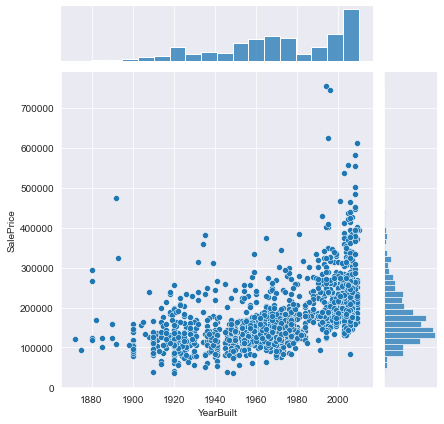

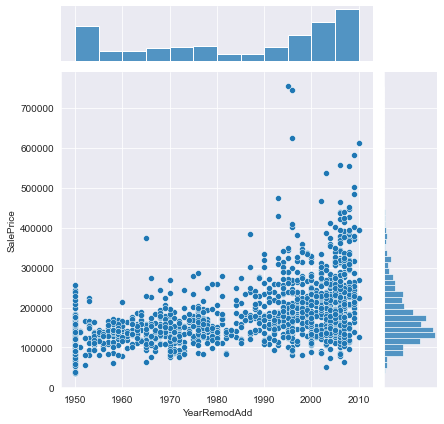

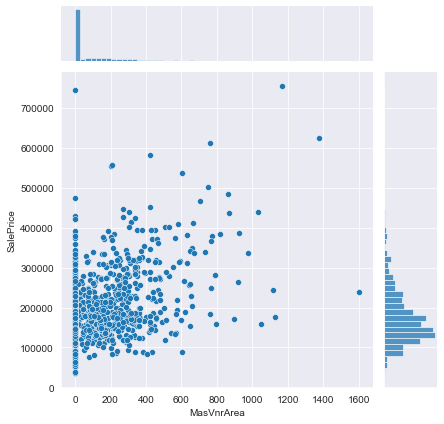

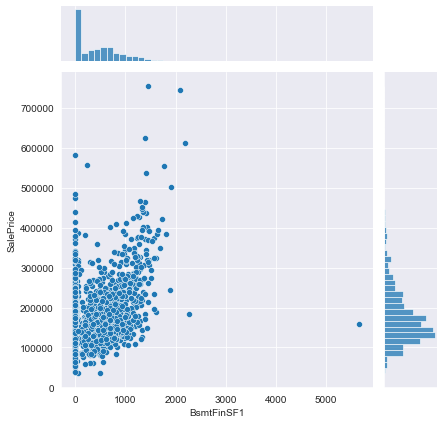

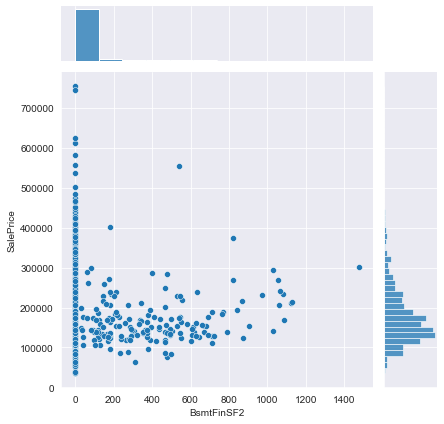

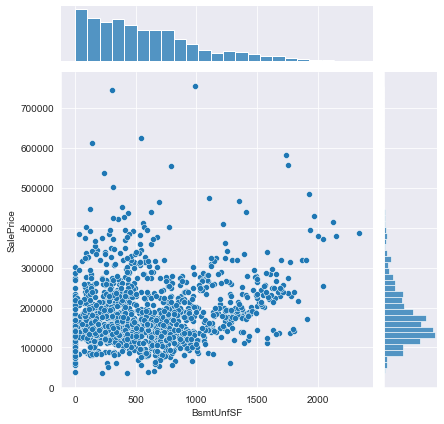

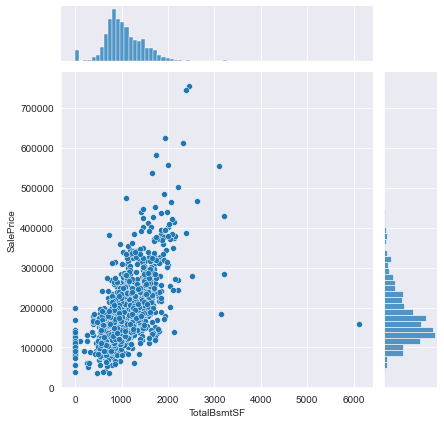

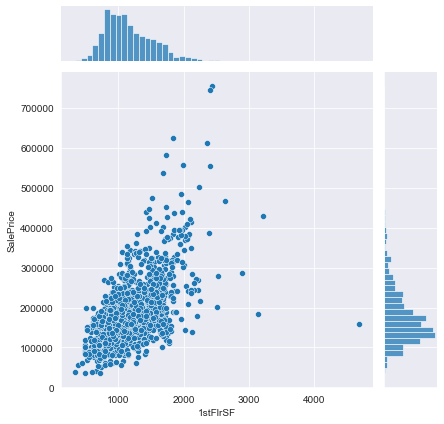

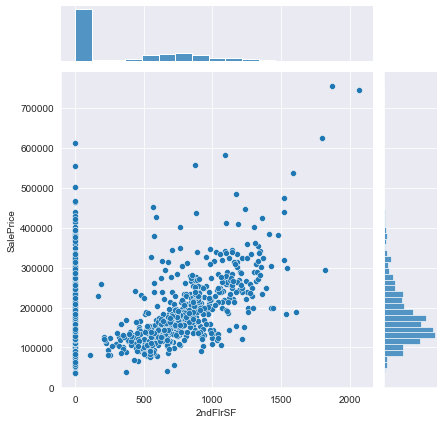

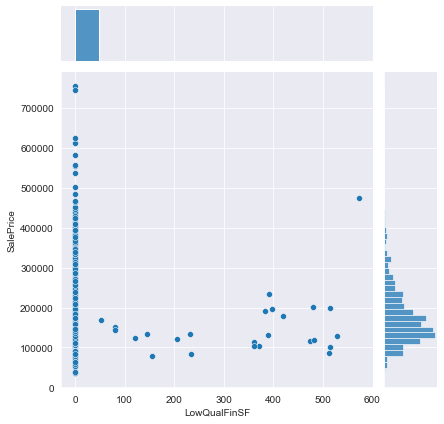

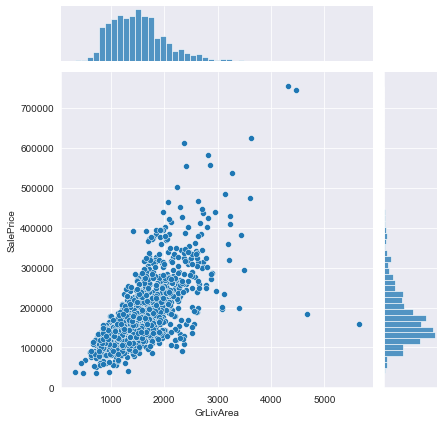

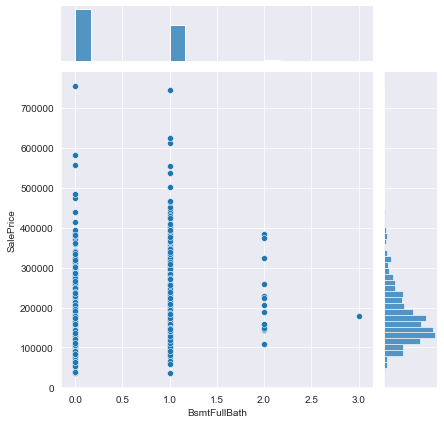

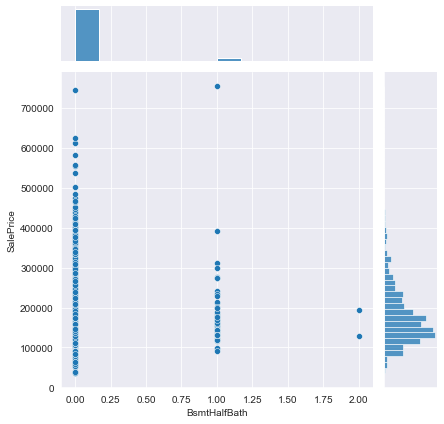

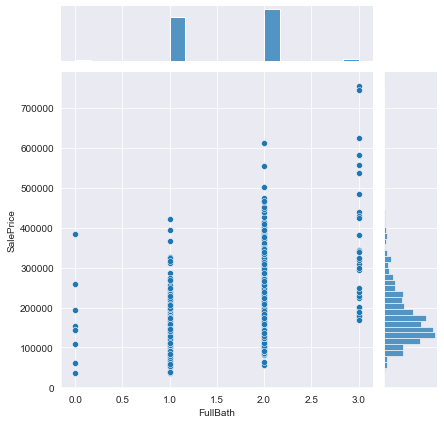

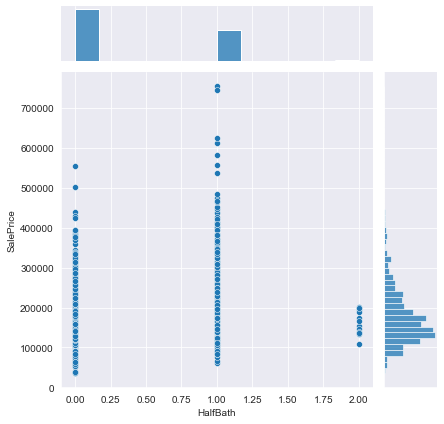

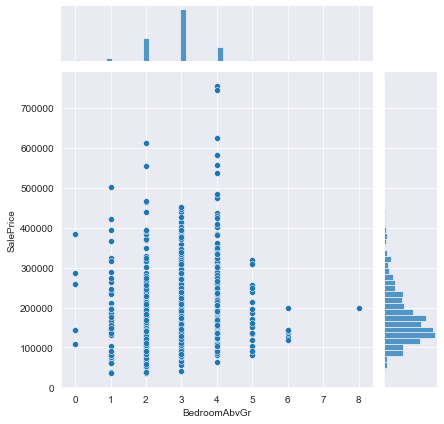

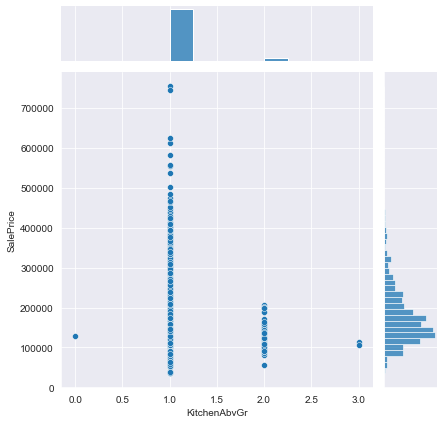

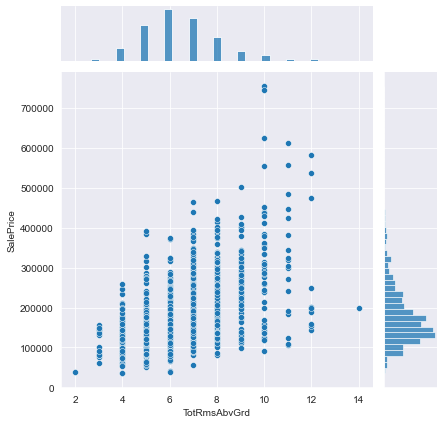

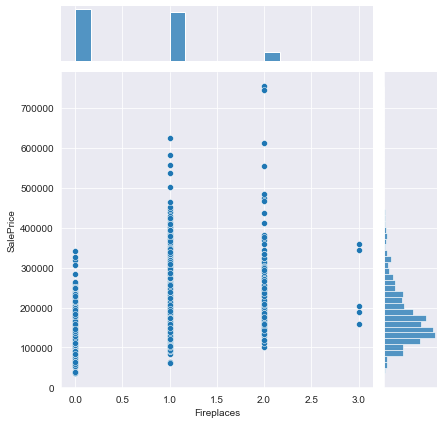

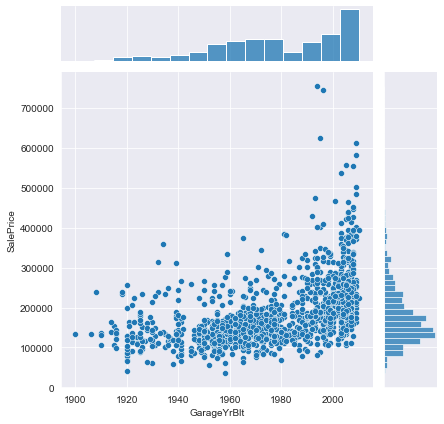

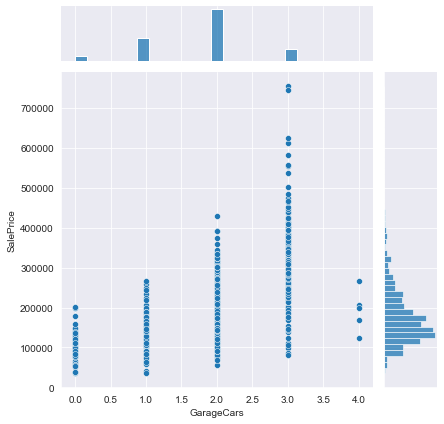

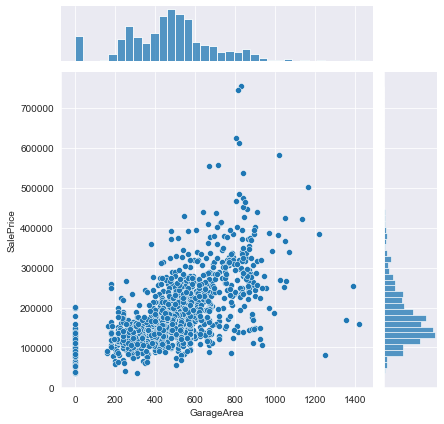

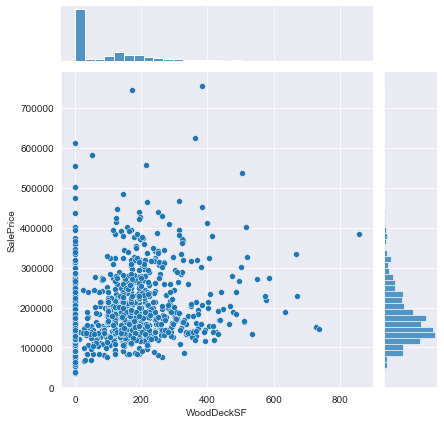

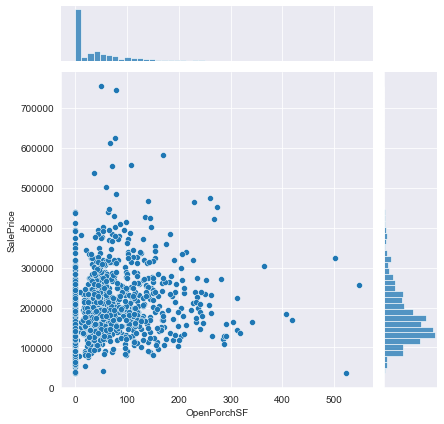

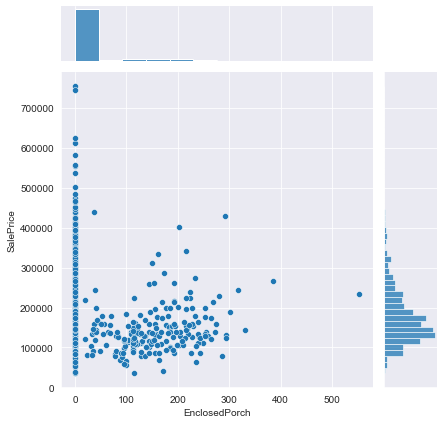

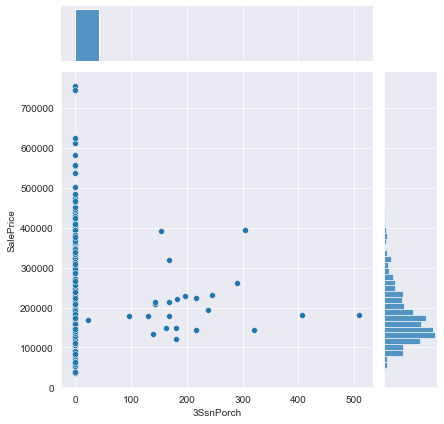

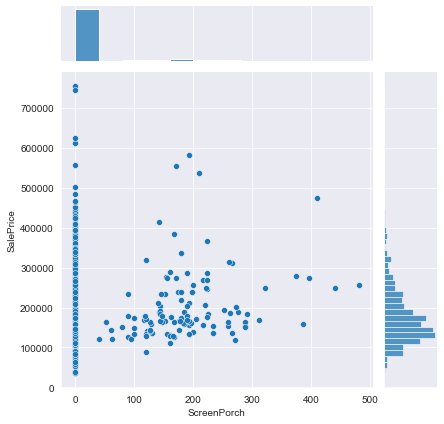

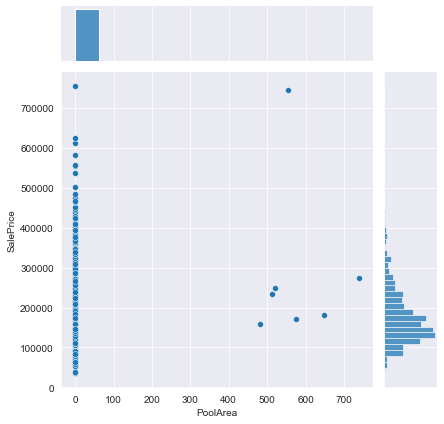

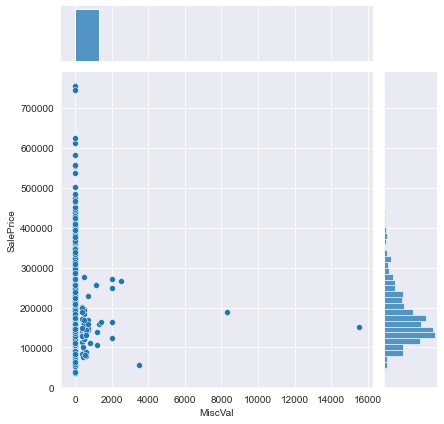

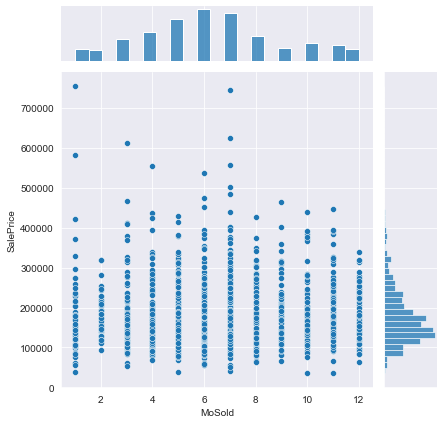

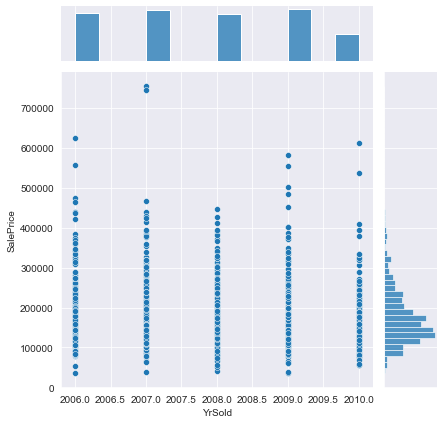

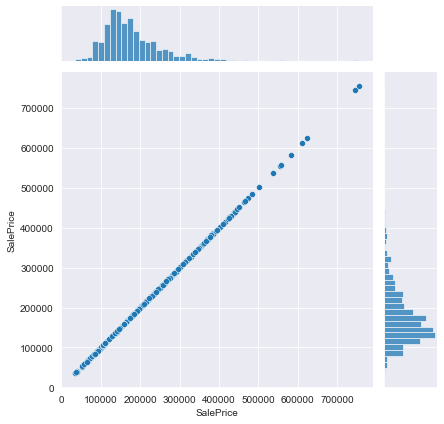

In [24]:
#making jointplots of features with SalePrice
for i in df_num.columns:
    sns.set_style('darkgrid')
    sns.jointplot(x = df_num[i], y=df_num['SalePrice'])
    plt.show()

In [25]:
#checking correaltion values again and dropping less correlated features
correlation_num.SalePrice

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

In [26]:
#dropped less correlated features 
column = ['MSSubClass','OverallCond','YrSold','LowQualFinSF','Id','MiscVal','BsmtHalfBath','BsmtFinSF2','3SsnPorch','MoSold',
         'PoolArea']
for i in column:
    df_num = df_num.drop(columns=i)

In [27]:
#filling empty values with median of that column
columns = ['LotFrontage','MasVnrArea','GarageYrBlt']
for i in columns:
    df_num[i].fillna(df[i].median(), inplace = True)

In [28]:
#applying to label encoding on categorical data to convert object type data into int type data
df_cat = df_cat.apply(LabelEncoder().fit_transform)

In [29]:
#joining both categorical and numerical datasets 
data = df_cat.join(df_num)
data.shape

(1460, 50)

In [30]:
#converting dataframe into array to scale the data
array = data.values
x = array[:,:-1]
y = array[:,-1]
robust = RobustScaler().fit(x)
x = robust.transform(x)
scaler = StandardScaler().fit(x)
x = scaler.transform(x)

In [31]:
#splitting the data in train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=30)

In [32]:
#applying machine learning algorithms. Fitting on training dataset and predicting the testign data
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(),
        Ridge(), Lasso()]
Accuracy=[]
Mae=[]
Mse=[]
Mse_sqrt=[]

for model in models:
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    accuracies = cross_val_score(estimator = model, X = x_test, y = y_test, cv = 5)
    accuracy= ("%.3f%% ") % (accuracies.mean()*100.0)
    Accuracy.append(accuracy)
    mae = mean_absolute_error(y_test,predict)
    Mae.append(mae)
    mse = (mean_squared_error(y_test,predict))
    Mse.append(mse)
    mse_sqrt= np.sqrt(mean_squared_error(y_test,predict))
    Mse_sqrt.append(mse_sqrt)

In [33]:
#final output of machine learning models
models = ['Linear Regression', 'Decision Tree',' Random Forest','Ridge', 'Lasso']
results = pd.DataFrame(Accuracy,models, columns = ['Accuracy'])
results

Accuracy
Linear Regression  85.418% 
Decision Tree      62.170% 
 Random Forest     87.519% 
Ridge              85.372% 
Lasso              85.354%

- Random Forest is performing with maximum accuracy.